# ART GAN

In this notebook, we attempt to explore building Generative Adversarial Networks (GANs) for the purpose of generating new images of artworks. 

### Problem Statement

We are interested in attempting to answer a few questions through the course of this project.

First and most importantly, we want to understand if GANs can help us generate new data in the field of artworks. This can be extended and explored more deeply in the future whereby artists can use GANs for inspiration in creating new works of art similar to their style or a combination of styles from different artists.

Secondly, we want also want to gain a better understanding of GANs and to better understand how to optimize them for the best results.

### Outline

* [Section 1: Introduction to GANs](#sec_1)
* [Section 2: Data Generation, Exploration and Augmentation](#sec_2)
* [Section 3: Building a GAN/ Modelling](#sec_3)
* [Section 4: Model Evaluation](#sec_4)
* [Section 5: Model Refinements](#sec_5)
* [Section 6: Findings](#sec_6)

### <a name='sec_1'></a> Section 1: Introduction to GANs

In 2014, Ian Goodfellow, currently employed at Apple Inc. as its director of machine learning in the Special Projects Group, and a few other researchers released a paper on [Generative Adversarial Nets](https://arxiv.org/abs/1406.2661). The paper proposed a new framework for estimating generative models via an adversarial process, in whcih 2 models are simultaneously trained: a generative model that captures the data distribution and a discriminative model that estimates the probability that a sample came from the training data rather than the generative model.

This framework corresponds to a minimax two-player game. The generative model is attempting to maximize the probability of the discriminative model making a mistake and the discriminative model is attempting to minimize its discriminating mistakes. In the space of arbituary models, a unique solution exists where the probability of the discriminative model classifying the sample as coming from the training data and the generative model is half.

A simple framework to think about the entire architecure is as such:
1. We use the generative model to generate X amount of samples
2. We randomly sample X amount of inputs from our training data
3. We feed a batch size of 2X samples into our discriminator to tell us which are real and which are generated
4. The generative model uses this information to generate better samples and the process repeats
5. The model reaches its 'solution' when the discriminator is unable to tell us whether the sample is real or generated (i.e. a 0.5 probability for both cases)

The entire system can be trained with backpropagation.

### <a name='sec_2'></a>Section 2: Data Generation, Exploration and Augmentation

For this project, we are working with [color field paintings](https://www.tate.org.uk/art/art-terms/c/colour-field-painting). This is the style of art popularized by artists such as Mark Rothko and Jackson Pollock. Color field painting is a style of abstract painting that emerged in New York City during the 1940s and 1950s. It was inspired by European modernism and closely related to abstract expressionism, while many of its notable early proponents were among the pioneering abstract expressionists. Color field is characterized primarily by large fields of flat, solid color spread across or stained into the canvas creating areas of unbroken surface and a flat picture plane. The movement places less emphasis on gesture, brushstrokes and action in favour of an overall consistency of form and process. In color field painting "color is freed from objective context and becomes the subject in itself."

This was also the reason why this genre of art was selected. It allows for simple assessment of the end product given that the style of art is distinct. The style also is 2 dimensional, simplyfing the process and removing picture depth out of the equation. We will be looking out for tell-tale signs such as solid colors creating unbroken surfaces.

The training set or actual paintings were scraped from Wikiart with the help of Selenium. The code can be found in the notebook titled 'Web Image Scraping (Wikiart). After exploring the website and selected artists, the amount of images scraped was 937. This was due to the fact this genre of art is rather specific and unlike expressionist works in general as an example. 

Here are some examples of paintings from the scraped data:

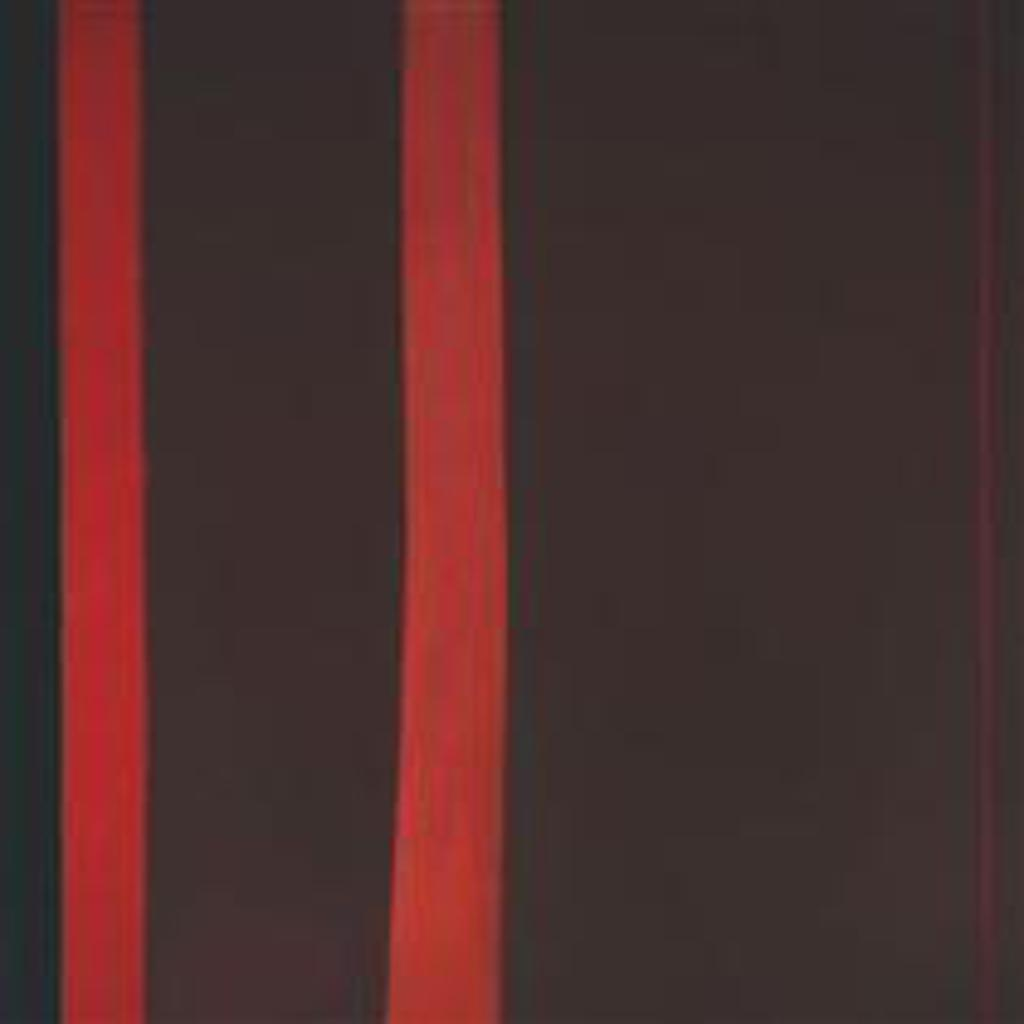

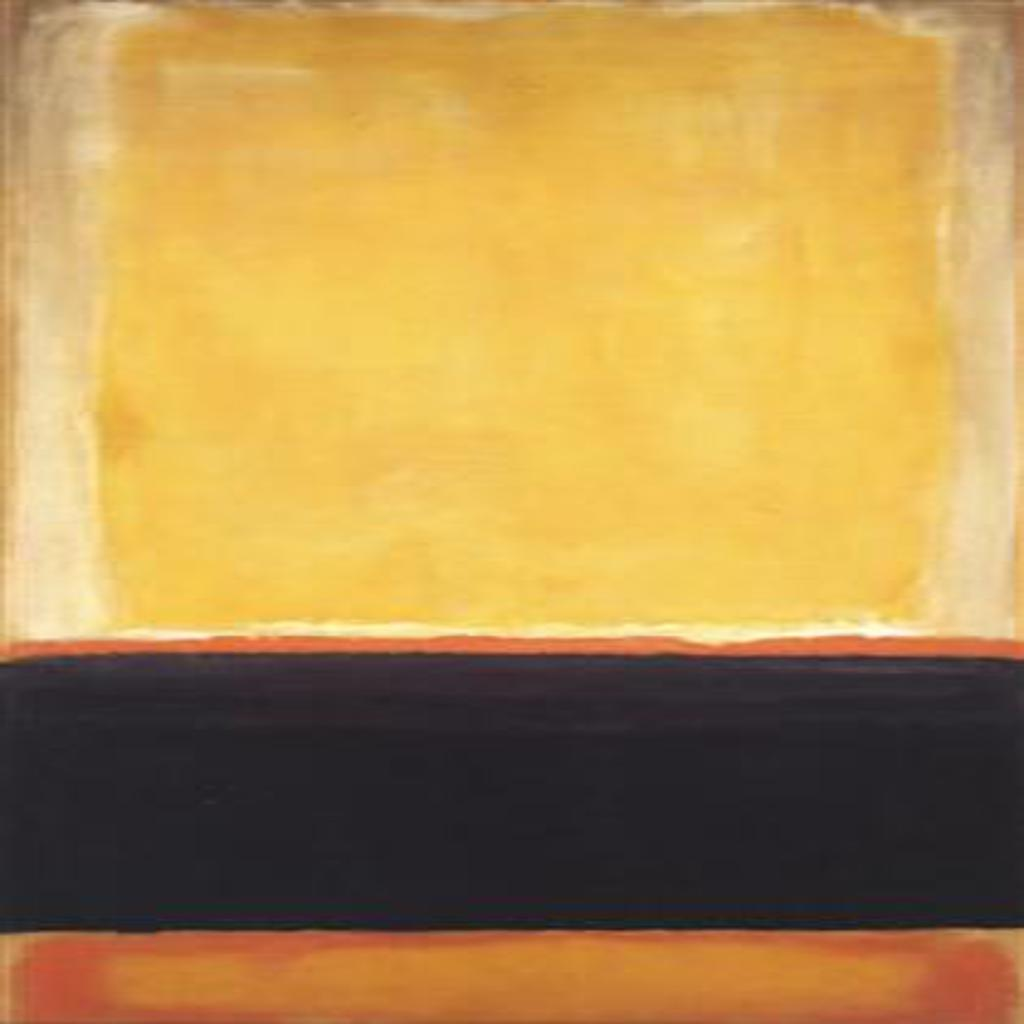

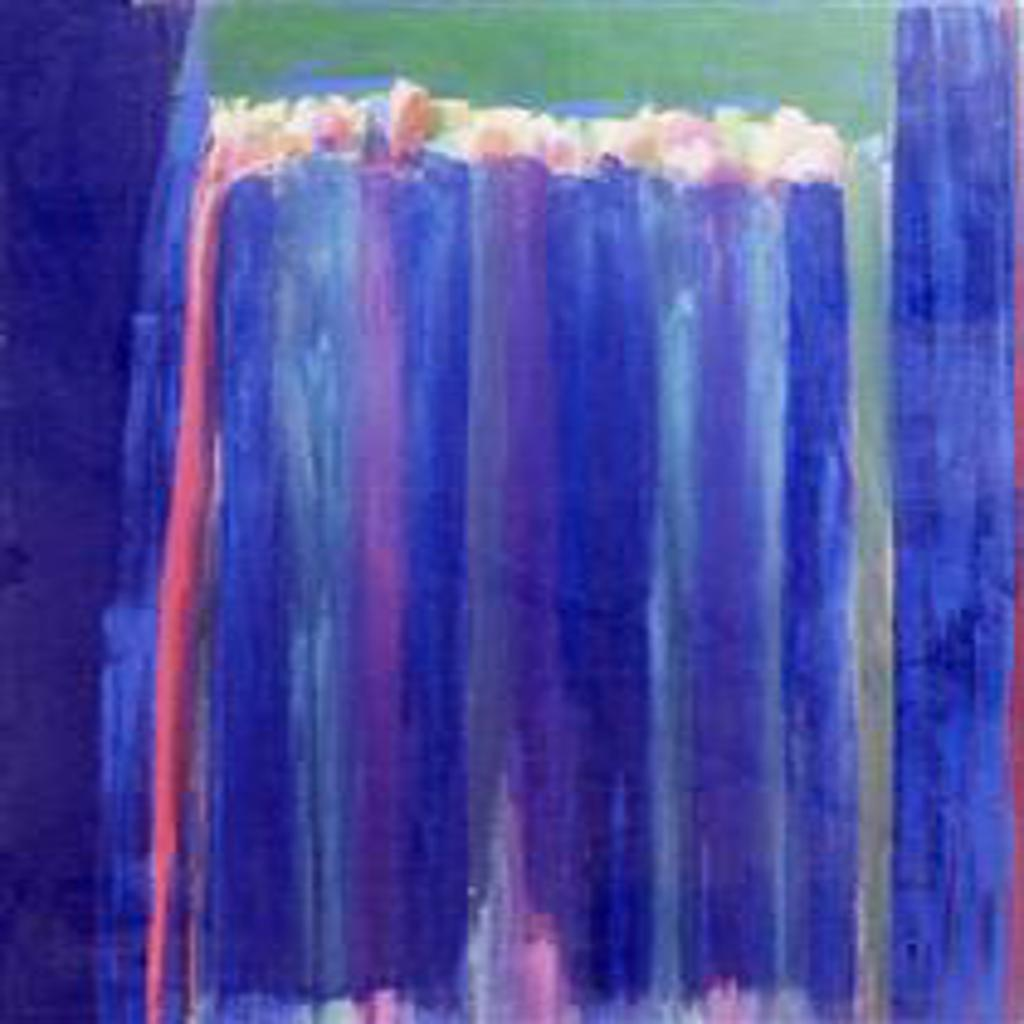

In [4]:
from IPython.display import Image, display

listOfImageNames = ['./data/images_augmented/Barnet Newman22.jpg',
                    './data/images_augmented/Mark Rothko24.jpg',
                   './data/images_augmented/Ronnie Landfield9.jpg']

for imageName in listOfImageNames:
    display(Image(filename=imageName, width = 200, height =200))

Given that the genre of art does not have any specific orientation per se and no subject of painting(e.g. portraits or landscape paintings), there is quite some room for us to augment images to grow and expand our dataset. We also want to look at some of the features of the images from our dataset as well.

Image format: JPEG
Image mode: RGB


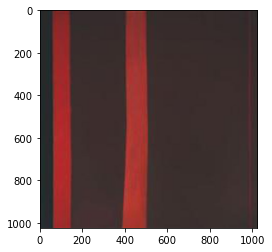

In [8]:
from PIL import Image
image = Image.open('./data/images_augmented/Barnet Newman22.jpg')
print(f'Image format: {image.format}')
print(f'Image mode: {image.mode}')
plt.imshow(image);

There are a few augmentations we can make to the original image to grow our dataset. Before that, we resize the image to 1024 x 1024 as well. This is rather large can be changed at any point in the code. The transformations will allow us to have 6 images instead of just 1:

1. The original
2. Rotated 90 degrees
3. Rotated 180 degrees
4. Rotated 270 degrees
5. Flipped left to right
6. Flipped top to bottom

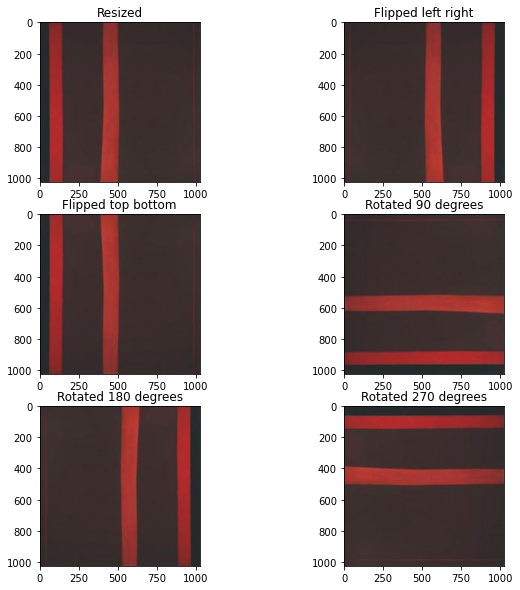

In [9]:
image = image.resize((1024,1024), resample=Image.BICUBIC)  # We use bicubic here as it is deemed to produce better results

plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
plt.title('Resized')
plt.imshow(image)
plt.subplot(3,2,2)
plt.title('Flipped left right')
plt.imshow(image.transpose(Image.FLIP_LEFT_RIGHT))
plt.subplot(3,2,3)
plt.title('Flipped top bottom')
plt.imshow(image.transpose(Image.FLIP_TOP_BOTTOM))
plt.subplot(3,2,4)
plt.title('Rotated 90 degrees')
plt.imshow(image.transpose(Image.ROTATE_90))
plt.subplot(3,2,5)
plt.title('Rotated 180 degrees')
plt.imshow(image.transpose(Image.ROTATE_180))
plt.subplot(3,2,6)
plt.title('Rotated 270 degrees')
plt.imshow(image.transpose(Image.ROTATE_270))

We originally had 940 images but after augmenting, we now have 5622 (937 x 6). 

After sifting through the new dataset, some images could not be used, due to the original odd sizing, resulting in just white boxes. These images are mostly ones which were originally narrow and very tall. We cleaned those and now are left with a total of **5,532 images**. The full code can be found in the notebook 'Image Augmentation'.

There were a few images that were excluded for a variety of reasons. They were either:
* Photos of arts installations instead of paintings themselves
* Paintings with little information that would be useful for training
* Originally tall and narrow painitngs that were cropped disproportionately after resizing, leaving behind just a small block of colour.

These pictures were removed from the dataset.

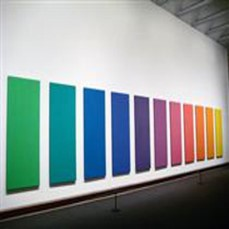

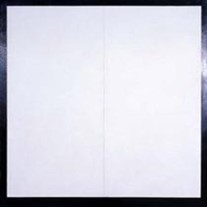

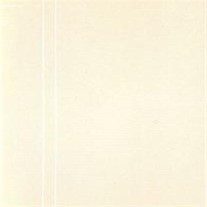

In [12]:
from IPython.display import display, Image

listOfImageNames = ['./data/misc_images/1.jpg',
                    './data/misc_images/2.jpg',
                   './data/misc_images/3.jpg']

for imageName in listOfImageNames:
    display(Image(filename=imageName, width = 200, height =200))


References:

[Data augmentation techniques](https://towardsdatascience.com/data-augmentation-techniques-in-python-f216ef5eed69)

[Data augmentation to address overfitting](https://www.youtube.com/watch?v=mTVf7BN7S8w&ab_channel=codebasics)

[imgaug documentation](https://imgaug.readthedocs.io/en/latest/index.html)

[Image Processing with Python PIL](https://www.youtube.com/watch?v=dkp4wUhCwR4&ab_channel=PyMoondra)

We now move on to importing our dataset and preparing it for modelling

In [19]:
# We first handle our imports
import numpy as np
from numpy import zeros
from numpy.random import randn
import matplotlib.pyplot as plt
from matplotlib import image
import matplotlib.image as mpimg
from numpy import expand_dims, ones, zeros
from numpy.random import rand, randint
import glob
import os
import csv
import cv2
import pydot
import pickle
#import graphviz
%matplotlib inline

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, LeakyReLU, Reshape, Conv2DTranspose
from tensorflow.keras.utils import plot_model
from PIL import Image
from IPython.display import display
import PIL

In [13]:
# Define global path to read in files from
from_path = 'C:/Users/User/Desktop/capstone/data/images_augmented/'

In [14]:
# Define function to load images and store in a dataset
# We are using cv2 to read in images, which read in as BGR, we have to include a line to convert to RGB 
# as matplotlib uses RGB instead
# https://stackoverflow.com/questions/50963283/python-opencv-imshow-doesnt-need-convert-from-bgr-to-rgb
def load_images(path):
    images = []
    for filename in os.listdir(path):
        img = cv2.imread(os.path.join(path,filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (64,64))
        img = (img-127.5) / 127.5
        if img is not None:
            images.append(img)
    return images

In [15]:
# Read in images
dataset = load_images(from_path)

In [16]:
# Check the data
dataset[1]

array([[[ 0.95294118,  0.92156863,  0.89803922],
        [ 0.9372549 ,  0.90588235,  1.        ],
        [ 0.92941176,  0.92941176,  0.68627451],
        ...,
        [ 0.82745098,  0.8745098 ,  0.82745098],
        [ 0.9372549 ,  0.90588235,  0.82745098],
        [ 0.94509804,  0.95294118,  0.91372549]],

       [[ 0.79607843,  0.76470588,  0.74117647],
        [-0.0745098 , -0.10588235,  0.17647059],
        [-0.65490196, -0.70980392, -0.15294118],
        ...,
        [-0.49019608, -0.48235294, -0.2       ],
        [ 0.84313725,  0.80392157,  0.86666667],
        [ 0.90588235,  0.90588235,  0.81960784]],

       [[ 0.75686275,  0.7254902 ,  0.70196078],
        [ 0.09019608,  0.05098039,  0.54509804],
        [ 0.08235294,  0.0745098 ,  0.65490196],
        ...,
        [-0.20784314, -0.19215686,  0.36470588],
        [ 0.61568627,  0.58431373,  0.78823529],
        [ 0.94509804,  0.95294118,  0.81960784]],

       ...,

       [[ 0.79607843,  0.79607843,  0.78039216],
        [ 0

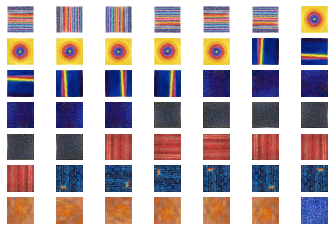

In [17]:
# Plot out the images to see if they are imported accurately
for i in range(49):
    plt.subplot(7,7, 1 + i)
    plt.axis('off')
    # scale values from [-1,1] to [0,1]
    plt.imshow((dataset[i] + 1) / 2)
plt.show()

In [18]:
# We then convert the entire dataset to an array and check the shape
dataset = np.array(dataset)
print(f'Dataset shape: {dataset.shape}')

Dataset shape: (5532, 64, 64, 3)


Our dataset is now ready to be used.

### <a name='sec_3'></a>Section 3: Building a GAN/ Modelling

We can now move on to start building the model itself. A sample run of how a GAN works was done in a seperate notebook using the MNIST dataset of handwritten digits. This was done to understand the entire process flow and how different parts of the model flowed together. You can take a look inside the notebook 'Sample Gan (mnist)'.

There are a few broad moving parts that we have to handle in piecing together our GAN.

The first would be the discriminator. This is not unlike any other CNN classification model. It will take an input of the picture shape followed by a few convolutional layers and lastly a dense layer with output 1 with sigmoid activation for us to determine whether the image is real (label 1) or fake (label 0). As this is a binary classification problem, the loss would be binary crossentropy and accuracy will be monitored as well.

The second would be the generator. This model runs by taking random noise input, followed by a couple of layers of upsampling and finally throwing an output which would be of the same size as the data in our training set. 

The third would be piecing the 2 parts above together, the discriminator and generator. This can be done in a number of ways but one of them would be to stack these two models together in a new model with the weights of this new model being the weights of both the discriminator and generator.

Of course, there are other considerations throughout the process such as generating random noise, periodically saving the outputs and models and these will be covered further below.

### 3.1: Defining global variables/ hyperparameters

We first define some global variables/ hyperparameters. These values will be fed into the model later on. The choice of values were based on research done in the field and what the optimal inputs were.

In [20]:
# Defining global variables
# For Discriminator
alpha = 0.2
strides =(2,2)
adamlr = 0.0002
beta_1=0.5

# For Generator
latent_dim = 100
n_nodes = 4 * 4 * 256
n_samples = 49

### 3.2 Defining Discriminator Model

The discriminator model will take in our input (64 x 64 images) and return a binary classification. The discriminator starts off with a normal convolutional layer followed by others to downsample the image using a 2x2 stride. There are no pooling layers used as this is the [best practice](https://machinelearningmastery.com/how-to-code-generative-adversarial-network-hacks/). Instead, we are using strided convulations. [There are both pros and cons in doing so](https://stats.stackexchange.com/questions/387482/pooling-vs-stride-for-downsampling). The advantage of the convolution layer is that it can learn certain properties that you might not think of while you add pooling layer. Pooling is a fixed operation and convolution can be learned. On the other hand, pooling is a cheaper operation than convolution, both in terms of the amount of computation that you need to do and number of parameters that you need to store (no parameters for pooling layer).

[LeakyReLU activation is also used in the convulational layers](https://machinelearningmastery.com/how-to-code-generative-adversarial-network-hacks/). The rectified linear activation unit, or ReLU for short, is a simple calculation that returns the value provided as input directly, or the value 0.0 if the input is 0.0 or less. It has become a best practice when developing deep convolutional neural networks generally. The best practice for GANs is to use a variation of the ReLU that allows some values less than zero and learns where the cut-off should be in each node. This is called the leaky rectified linear activation unit, or LeakyReLU for short.

A negative slope can be specified for the LeakyReLU and the default value of 0.2 is recommended. Originally, ReLU was recommend for use in the generator model and LeakyReLU was recommended for use in the discriminator model, although more recently, the LeakyReLU is recommended in both models.

The last layers uses a sigmoid activation as we are interested in a binary classification problem.

We compile the model using binary crossentropy with the optimizer being the [Adam version of stochastic gradient descent](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/). There are many variants of the training algorithm. The best practice for training DCGAN models is to use the Adam version of stochastic gradient descent with the learning rate of 0.0002 and the beta1 momentum value of 0.5 instead of the default of 0.9. The Adam optimization algorithm with this configuration is recommended when both optimizing the discriminator and generator models.

The model code and summary are below.


In [21]:
# Define discriminator

def define_discriminator(in_shape=(64,64,3)):
    model = Sequential()
    
    # Normal
    model.add(Conv2D(128, (3,3), padding ='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=alpha))
    
    # Downsample
    model.add(Conv2D(256, (3,3), strides = strides, padding ='same'))
    model.add(LeakyReLU(alpha=alpha))
    
    # Downsample
    model.add(Conv2D(256, (3,3), strides = strides, padding ='same'))
    model.add(LeakyReLU(alpha=alpha))
    
    # Downsample
    model.add(Conv2D(512, (3,3), strides = strides, padding ='same'))
    model.add(LeakyReLU(alpha=alpha))
    
    # Classifier
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile
    opt = Adam(learning_rate=adamlr, beta_1=beta_1)
    model.compile(loss='binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
    return model

In [22]:
model = define_discriminator()
model.summary()
#plot_model(model, to_file='discriminator_model.png', show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 128)       3584      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 256)       295168    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 256)       590080    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 512)         1

### 3.3 Defining the Generator Model

The next step in modelling would be the define the generator model. The generator model is in charge of generating fake images. There are a number of ways to do this but one of the most common ones is to take points from a latent space and feed them into the model to output an image.

A [latent space](https://towardsdatascience.com/understanding-latent-space-in-machine-learning-de5a7c687d8d#:~:text=The%20latent%20space%20is%20simply,representations%20of%20data%20for%20analysis.) is simply a representation of compressed data in which similar data points are closer together in space. Latent space is useful for learning data features and for finding simpler representations of data for analysis. In the field of GANs, the latent space recommended is a defined vector of Gaussian-distributed values. 

The generator model will draw random points from the latent space randomly and feed them into the generator model during training and this will serve as 'noise'. The generator model will assign meaning to the latent points and in turn, the latent space as a whole. At the end of training, the space will represent a compressed representation of the output space that only the generator knows how to turn into plausible images.

The generator model takes in the latent points and upsamples them through a series of convolutional layers until the output matches the size of our real training data. Once again, LeakyReLU activation layers are recommended. The model will take in a vector space of 100 elements and slowly move towards producing a 2D array of 12,288 values or 64 x 64 x3.

In [23]:
# Define Generator
def define_generator(latent_dim):
    model = Sequential()
    
    model.add(Dense(n_nodes, input_dim = latent_dim))
    model.add(LeakyReLU(alpha=alpha))
    model.add(Reshape((4,4,256)))
    
    # upsample to 8 x 8
    model.add(Conv2DTranspose(128,(4,4), strides = strides, padding ='same'))
    model.add(LeakyReLU(alpha=alpha))
    
    # upsample to 16 x 16
    model.add(Conv2DTranspose(128,(4,4), strides = strides, padding ='same'))
    model.add(LeakyReLU(alpha=alpha))
    
    # upsample to 32 x 32
    model.add(Conv2DTranspose(128,(4,4), strides = strides, padding ='same'))
    model.add(LeakyReLU(alpha=alpha))
    
    # upsample to 64 x 64
    model.add(Conv2DTranspose(128,(4,4), strides = strides, padding ='same'))
    model.add(LeakyReLU(alpha=alpha))
    
    
    # output layer
    model.add(Conv2D(3, (3,3), activation = 'tanh', padding = 'same'))
    
    return model


In [24]:
model = define_generator(latent_dim)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4096)              413696    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 4096)              0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 8, 8, 128)         524416    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 16, 16, 128)       262272    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 16, 16, 128)      

We will also need a function to generate random latent points from our latent space. The function will help us generate 100 random points from the latent space for each sample that we want.

In [25]:
# Function to generate new random points in latent space as input for generator
def generate_latent_points(latent_dim, n_samples):
    x_input = randn(latent_dim * n_samples)
    # reshape into  batch for NN
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

We will also define a function to generate fake samples through out generator model.

In [26]:
# use generator to generate random inputs
def generate_fake_samples(g_model, latent_dim, n_samples):
    # generate the random points in latent space
    x_input = generate_latent_points(latent_dim, n_samples)
    # predict output
    X = g_model.predict(x_input)
    
    # New line, scale values from [-1,1] to [0,1]
    #X = (X+1)/2
    
    # create 'fake' class labels (0)
    y = zeros((n_samples,1))
    return X,y

When we run the function above, we can see that the generator model (untrained) will throw images with no meaning as seen below:

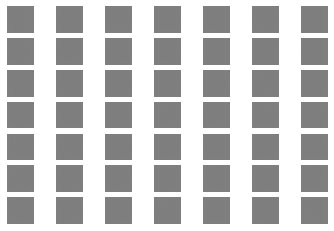

In [27]:
X, _ = generate_fake_samples(model, latent_dim, n_samples)

# scale pixel values
X = (X+1)/ 2

for i in range(n_samples):
    plt.subplot(7,7,1+i)
    plt.axis('off')
    plt.imshow(X[i])

plt.show()

### 3.4 Combining Generator and Discriminator

We have to first understand the nature of training for both the generator and discriminator. Weights in the generator model are updated based on the performance of the discriminator model.

When the discriminator is performing well, the generator is updated more. Vice versa, when the discriminator model is performing poorly, the generator model is updated less. 

This is essence, is the 'adversarial' nature between these 2 models.

Now that we have both our generator and discriminator defined, we can combine them together. There are a number of ways to do so but one simple solution is to create a new model that stacks both the generator and discriminator on top of each other. This model has no weights but is just simply used to layer the models together. 

Specifically, a new GAN model can be defined that stacks the generator and discriminator such that the generator receives as input random points in the latent space and generates samples that are fed into the discriminator model directly, classified, and the output of this larger model can be used to update the model weights of the generator.

As the discriminator model is a standalone classifier model, the model can be trained independely. On the other hand, the generator model is only concerned with the discriminator's performance on fake samples - as such, there will be a need to mark the layers in the discriminator as not trainable when it is part of the third model so that they will not be updated and overtrained on fake samples.

When training the generator model in this combined architecture, there is also a need for the discriminator to think that the samples generated by the generator are real. When doing so, the discriminator model will throw a large error as the fake samples are indeed, fake. When the generator takes in this feedback, it will in turn make the generator better at faking good samples.

In [28]:
# define gan
def define_gan(g_model, d_model):
    # make weights in discriminator not trainable
    d_model.trainable = False
    
    # connect the 2 models
    model = Sequential()
    
    # add generator
    model.add(g_model)
    
    # add discriminator
    model.add(d_model)
    
    # compile
    opt = Adam(learning_rate=adamlr, beta_1 = beta_1)
    model.compile(loss='binary_crossentropy', optimizer = opt)
    return model

We will also need a function that helps us sample a number of real samples from our dataset. This will be in the size of a half-batch, given that we will need half real and half fake samples per batch.

In [29]:
def generate_real_samples(dataset, n_samples):
    # choose random instances
    ix = randint(0, dataset.shape[0], n_samples)
    X = dataset[ix]
    y= ones((n_samples, 1))
    return X, y

In [30]:
# Here we define our 3 models
d_model = define_discriminator()
g_model = define_generator(latent_dim)

gan_model = define_gan(g_model, d_model)
gan_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 64, 64, 3)         1728387   
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 2101761   
Total params: 3,830,148
Trainable params: 1,728,387
Non-trainable params: 2,101,761
_________________________________________________________________


To keep track of our progress, we will also have to create functions that periodically save the models and also the status of our generated model. We will do this once every 10 epochs

In [31]:
# create a function to save plots periodically
def save_plot(examples, epoch, n=7):
    # scale from [-1,1] to [0,1]
    examples = (examples+1) / 2
    
    # plot
    for i in range(n * n):
        # define subplot
        plt.subplot(n,n,1+i)
        plt.axis('off')
        plt.imshow(examples[i])
    figname = 'generated_plot_epoch%03d.png' % (epoch+1) 
    plt.savefig(figname)
    plt.close


In [32]:
# define function to summarize performance and save images
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=150):
    # prepare real samples
    X_real, y_real = generate_real_samples(dataset, n_samples)
     # evaluate discriminator on real samples
    _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
    
    # prepare fake samples
    X_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
    # evaluate discriminator on fakes
    _, acc_fake = d_model.evaluate(X_fake, y_fake, verbose = 0)
    
    # summarize discriminator performance
    print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
    
    # save plot
    save_plot(X_fake, epoch)
    
    # save the generator model tile file
    filename = 'generator_model_%03d.h5' % (epoch+1)
    g_model.save(filename)

### 3.5 Combining all elements into training

The next step would be to combine everything and train the model. This will be done with the following function.

We iterate through our set number of epochs followed by iterating through each batch in each epoch (as set by our batch size). For each run, we first generate half batches of real samples and train the discriminator followed by doing the same with fake samples. [Studies](https://machinelearningmastery.com/how-to-code-generative-adversarial-network-hacks/) have shown that this is better done seperately rather than together by seperating batches of real and fake images. We then generate latent points as input for our generator and generate fake samples and label these as real. We then train the gan model on this set of data.

Every 10 epochs, we print the results, save some plots and the generator model.

In [33]:
# define training phase
def train_gan(g_model,d_model, gan_model, dataset, latent_dim, n_epochs = 200, n_batch = 128):
    bat_per_epo = int(dataset.shape[0]/ n_batch)
    half_batch = int(n_batch/2)
    
    # iterate through epochs
    for i in range(n_epochs):
        # iterate batches over the training set
        for j in range(bat_per_epo):
            # get randomly selected real samples
            X_real, y_real = generate_real_samples(dataset, half_batch)
            # update discriminator model weights
            d_loss1, _ = d_model.train_on_batch(X_real, y_real)
            
            # generate fake samples
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            # update discriminator weights
            d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
            
            # prepare points in latent space as input for generator
            X_gan = generate_latent_points(latent_dim, n_batch)
            # create inverted labels for fake samples
            y_gan = ones((n_batch,1))
            
            # update the generator via the discriminator's error
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            
            # summarize loss on this batch
            print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
                (i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
            
            # evaluate the model performance, sometimes
            if (i+1) % 10 == 0:
                summarize_performance(i, g_model, d_model, dataset, latent_dim)

We train the gan model below.

>1, 1/43, d1=0.176, d2=0.211 g=2.964
>1, 2/43, d1=0.259, d2=0.167 g=2.962
>1, 3/43, d1=0.207, d2=0.198 g=3.102
>1, 4/43, d1=0.111, d2=0.096 g=3.082
>1, 5/43, d1=0.081, d2=0.201 g=3.442
>1, 6/43, d1=0.322, d2=0.121 g=3.121
>1, 7/43, d1=0.185, d2=0.206 g=3.089
>1, 8/43, d1=0.247, d2=0.166 g=3.050
>1, 9/43, d1=0.310, d2=0.147 g=3.287
>1, 10/43, d1=0.197, d2=0.127 g=3.204
>1, 11/43, d1=0.374, d2=0.350 g=3.090
>1, 12/43, d1=0.222, d2=0.107 g=3.015
>1, 13/43, d1=0.264, d2=0.227 g=2.939
>1, 14/43, d1=0.200, d2=0.161 g=2.906
>1, 15/43, d1=0.137, d2=0.126 g=3.141
>1, 16/43, d1=0.193, d2=0.179 g=3.059
>1, 17/43, d1=0.212, d2=0.254 g=3.037
>1, 18/43, d1=0.156, d2=0.119 g=3.288
>1, 19/43, d1=0.223, d2=0.128 g=3.136
>1, 20/43, d1=0.178, d2=0.181 g=3.220
>1, 21/43, d1=0.330, d2=0.211 g=2.860
>1, 22/43, d1=0.287, d2=0.355 g=3.621
>1, 23/43, d1=0.337, d2=0.132 g=3.400
>1, 24/43, d1=0.263, d2=0.217 g=3.452
>1, 25/43, d1=0.302, d2=0.238 g=3.626
>1, 26/43, d1=0.219, d2=0.115 g=3.685
>1, 27/43, d1=0.325, 

>6, 3/43, d1=0.195, d2=0.312 g=3.522
>6, 4/43, d1=0.456, d2=0.223 g=2.957
>6, 5/43, d1=0.105, d2=0.291 g=3.271
>6, 6/43, d1=0.308, d2=0.110 g=3.164
>6, 7/43, d1=0.352, d2=0.422 g=3.085
>6, 8/43, d1=0.165, d2=0.062 g=3.369
>6, 9/43, d1=0.262, d2=0.204 g=3.375
>6, 10/43, d1=0.218, d2=0.146 g=3.281
>6, 11/43, d1=0.171, d2=0.348 g=3.362
>6, 12/43, d1=0.458, d2=0.352 g=3.238
>6, 13/43, d1=0.256, d2=0.163 g=3.273
>6, 14/43, d1=0.336, d2=0.122 g=3.123
>6, 15/43, d1=0.163, d2=0.234 g=3.284
>6, 16/43, d1=0.124, d2=0.086 g=3.302
>6, 17/43, d1=0.183, d2=0.204 g=3.343
>6, 18/43, d1=0.233, d2=0.104 g=3.235
>6, 19/43, d1=0.238, d2=0.120 g=3.060
>6, 20/43, d1=0.216, d2=0.163 g=3.505
>6, 21/43, d1=0.106, d2=0.088 g=3.523
>6, 22/43, d1=0.266, d2=0.101 g=2.968
>6, 23/43, d1=0.074, d2=0.090 g=3.121
>6, 24/43, d1=0.132, d2=0.260 g=3.726
>6, 25/43, d1=0.127, d2=0.048 g=3.727
>6, 26/43, d1=0.135, d2=0.064 g=3.130
>6, 27/43, d1=0.225, d2=0.569 g=4.636
>6, 28/43, d1=0.300, d2=0.096 g=3.850
>6, 29/43, d1=0.280

<ipython-input-191-333d4ed1322d>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(n,n,1+i)


>10, 3/43, d1=0.157, d2=0.155 g=3.322
>Accuracy real: 92%, fake: 97%
>10, 4/43, d1=0.185, d2=0.108 g=3.128
>Accuracy real: 95%, fake: 94%
>10, 5/43, d1=0.284, d2=0.114 g=3.323
>Accuracy real: 91%, fake: 94%
>10, 6/43, d1=0.179, d2=0.174 g=3.665
>Accuracy real: 93%, fake: 95%
>10, 7/43, d1=0.212, d2=0.237 g=3.508
>Accuracy real: 93%, fake: 99%
>10, 8/43, d1=0.102, d2=0.076 g=3.294
>Accuracy real: 91%, fake: 97%
>10, 9/43, d1=0.107, d2=0.128 g=3.162
>Accuracy real: 92%, fake: 95%
>10, 10/43, d1=0.157, d2=0.165 g=3.032
>Accuracy real: 93%, fake: 99%
>10, 11/43, d1=0.094, d2=0.071 g=3.475
>Accuracy real: 86%, fake: 100%
>10, 12/43, d1=0.141, d2=0.099 g=2.790
>Accuracy real: 97%, fake: 94%
>10, 13/43, d1=0.199, d2=0.321 g=3.552
>Accuracy real: 91%, fake: 99%
>10, 14/43, d1=0.106, d2=0.059 g=3.476
>Accuracy real: 89%, fake: 97%
>10, 15/43, d1=0.188, d2=0.118 g=3.330
>Accuracy real: 91%, fake: 99%
>10, 16/43, d1=0.088, d2=0.103 g=3.606
>Accuracy real: 90%, fake: 97%
>10, 17/43, d1=0.153, d2=0

>14, 10/43, d1=0.207, d2=0.068 g=3.929
>14, 11/43, d1=0.178, d2=0.146 g=3.803
>14, 12/43, d1=0.121, d2=0.191 g=3.807
>14, 13/43, d1=0.279, d2=0.064 g=3.304
>14, 14/43, d1=0.162, d2=0.178 g=3.217
>14, 15/43, d1=0.045, d2=0.140 g=3.820
>14, 16/43, d1=0.223, d2=0.109 g=3.578
>14, 17/43, d1=0.268, d2=0.168 g=3.658
>14, 18/43, d1=0.216, d2=0.133 g=3.573
>14, 19/43, d1=0.196, d2=0.139 g=3.530
>14, 20/43, d1=0.076, d2=0.132 g=3.951
>14, 21/43, d1=0.431, d2=0.180 g=3.475
>14, 22/43, d1=0.183, d2=0.106 g=3.438
>14, 23/43, d1=0.266, d2=0.086 g=3.199
>14, 24/43, d1=0.156, d2=0.170 g=3.262
>14, 25/43, d1=0.284, d2=0.185 g=3.332
>14, 26/43, d1=0.198, d2=0.077 g=3.343
>14, 27/43, d1=0.172, d2=0.142 g=3.610
>14, 28/43, d1=0.270, d2=0.118 g=3.491
>14, 29/43, d1=0.181, d2=0.205 g=3.861
>14, 30/43, d1=0.296, d2=0.067 g=3.458
>14, 31/43, d1=0.242, d2=0.425 g=3.904
>14, 32/43, d1=0.279, d2=0.112 g=3.745
>14, 33/43, d1=0.292, d2=0.176 g=3.299
>14, 34/43, d1=0.213, d2=0.111 g=3.457
>14, 35/43, d1=0.086, d2=

>19, 7/43, d1=0.159, d2=0.079 g=4.019
>19, 8/43, d1=0.226, d2=0.063 g=3.866
>19, 9/43, d1=0.333, d2=0.089 g=3.103
>19, 10/43, d1=0.132, d2=0.318 g=4.202
>19, 11/43, d1=0.206, d2=0.084 g=4.132
>19, 12/43, d1=0.376, d2=0.104 g=3.897
>19, 13/43, d1=0.223, d2=0.435 g=4.164
>19, 14/43, d1=0.291, d2=0.051 g=3.601
>19, 15/43, d1=0.245, d2=0.067 g=3.288
>19, 16/43, d1=0.169, d2=0.120 g=3.466
>19, 17/43, d1=0.185, d2=0.080 g=3.276
>19, 18/43, d1=0.148, d2=0.099 g=3.274
>19, 19/43, d1=0.136, d2=0.189 g=3.616
>19, 20/43, d1=0.174, d2=0.060 g=3.804
>19, 21/43, d1=0.262, d2=0.106 g=3.640
>19, 22/43, d1=0.136, d2=0.065 g=3.537
>19, 23/43, d1=0.245, d2=0.091 g=3.240
>19, 24/43, d1=0.162, d2=0.227 g=3.572
>19, 25/43, d1=0.095, d2=0.053 g=3.419
>19, 26/43, d1=0.210, d2=0.125 g=2.943
>19, 27/43, d1=0.153, d2=0.132 g=3.638
>19, 28/43, d1=0.283, d2=0.132 g=3.369
>19, 29/43, d1=0.102, d2=0.107 g=3.556
>19, 30/43, d1=0.146, d2=0.058 g=3.578
>19, 31/43, d1=0.328, d2=0.111 g=3.330
>19, 32/43, d1=0.254, d2=0.2

>23, 12/43, d1=0.259, d2=0.431 g=2.770
>23, 13/43, d1=0.363, d2=0.247 g=3.009
>23, 14/43, d1=0.569, d2=0.609 g=4.108
>23, 15/43, d1=0.879, d2=0.302 g=3.732
>23, 16/43, d1=0.431, d2=0.096 g=3.346
>23, 17/43, d1=0.319, d2=0.116 g=3.651
>23, 18/43, d1=0.240, d2=0.105 g=3.045
>23, 19/43, d1=0.224, d2=0.182 g=2.812
>23, 20/43, d1=0.107, d2=0.120 g=3.163
>23, 21/43, d1=0.202, d2=0.092 g=3.205
>23, 22/43, d1=0.339, d2=0.313 g=2.979
>23, 23/43, d1=0.162, d2=0.121 g=3.009
>23, 24/43, d1=0.328, d2=0.146 g=2.978
>23, 25/43, d1=0.207, d2=0.120 g=2.936
>23, 26/43, d1=0.305, d2=0.181 g=3.046
>23, 27/43, d1=0.106, d2=0.111 g=3.605
>23, 28/43, d1=0.263, d2=0.122 g=2.966
>23, 29/43, d1=0.170, d2=0.167 g=3.265
>23, 30/43, d1=0.211, d2=0.080 g=3.224
>23, 31/43, d1=0.138, d2=0.140 g=3.709
>23, 32/43, d1=0.228, d2=0.094 g=3.338
>23, 33/43, d1=0.217, d2=0.170 g=3.308
>23, 34/43, d1=0.144, d2=0.122 g=3.484
>23, 35/43, d1=0.095, d2=0.062 g=3.657
>23, 36/43, d1=0.172, d2=0.194 g=3.588
>23, 37/43, d1=0.071, d2=

>28, 9/43, d1=0.148, d2=0.102 g=3.527
>28, 10/43, d1=0.213, d2=0.147 g=3.303
>28, 11/43, d1=0.183, d2=0.386 g=4.038
>28, 12/43, d1=0.371, d2=0.124 g=3.801
>28, 13/43, d1=0.144, d2=0.159 g=3.488
>28, 14/43, d1=0.321, d2=0.338 g=3.582
>28, 15/43, d1=0.075, d2=0.077 g=3.883
>28, 16/43, d1=0.235, d2=0.138 g=3.300
>28, 17/43, d1=0.235, d2=0.239 g=3.461
>28, 18/43, d1=0.165, d2=0.094 g=3.535
>28, 19/43, d1=0.139, d2=0.116 g=3.430
>28, 20/43, d1=0.134, d2=0.090 g=3.621
>28, 21/43, d1=0.305, d2=0.078 g=3.548
>28, 22/43, d1=0.107, d2=0.078 g=3.929
>28, 23/43, d1=0.251, d2=0.258 g=3.906
>28, 24/43, d1=0.100, d2=0.042 g=4.054
>28, 25/43, d1=0.184, d2=0.069 g=3.663
>28, 26/43, d1=0.099, d2=0.179 g=3.941
>28, 27/43, d1=0.158, d2=0.049 g=3.399
>28, 28/43, d1=0.178, d2=0.169 g=3.463
>28, 29/43, d1=0.158, d2=0.091 g=3.661
>28, 30/43, d1=0.072, d2=0.057 g=4.186
>28, 31/43, d1=0.101, d2=0.114 g=4.674
>28, 32/43, d1=0.176, d2=0.048 g=3.884
>28, 33/43, d1=0.078, d2=0.072 g=3.851
>28, 34/43, d1=0.255, d2=0

>32, 14/43, d1=0.073, d2=0.056 g=4.163
>32, 15/43, d1=0.152, d2=0.081 g=3.766
>32, 16/43, d1=0.047, d2=0.075 g=3.621
>32, 17/43, d1=0.088, d2=0.071 g=3.452
>32, 18/43, d1=0.124, d2=0.091 g=3.579
>32, 19/43, d1=0.184, d2=0.075 g=3.667
>32, 20/43, d1=0.060, d2=0.324 g=5.444
>32, 21/43, d1=0.206, d2=0.061 g=3.995
>32, 22/43, d1=0.385, d2=0.195 g=3.818
>32, 23/43, d1=0.155, d2=0.151 g=4.314
>32, 24/43, d1=0.135, d2=0.030 g=4.343
>32, 25/43, d1=0.255, d2=0.148 g=3.771
>32, 26/43, d1=0.149, d2=0.096 g=4.022
>32, 27/43, d1=0.072, d2=0.095 g=4.600
>32, 28/43, d1=0.127, d2=0.047 g=3.954
>32, 29/43, d1=0.115, d2=0.063 g=3.709
>32, 30/43, d1=0.078, d2=0.064 g=3.732
>32, 31/43, d1=0.085, d2=0.069 g=3.957
>32, 32/43, d1=0.252, d2=0.127 g=3.992
>32, 33/43, d1=0.124, d2=0.044 g=3.976
>32, 34/43, d1=0.178, d2=0.171 g=3.655
>32, 35/43, d1=0.109, d2=0.093 g=4.060
>32, 36/43, d1=0.177, d2=0.044 g=3.661
>32, 37/43, d1=0.155, d2=0.167 g=3.990
>32, 38/43, d1=0.182, d2=0.093 g=4.438
>32, 39/43, d1=0.144, d2=

>37, 11/43, d1=0.464, d2=0.293 g=2.416
>37, 12/43, d1=0.443, d2=0.300 g=2.474
>37, 13/43, d1=0.345, d2=0.277 g=2.327
>37, 14/43, d1=0.400, d2=0.249 g=2.465
>37, 15/43, d1=0.232, d2=0.508 g=2.391
>37, 16/43, d1=0.430, d2=0.296 g=2.226
>37, 17/43, d1=0.409, d2=0.427 g=2.413
>37, 18/43, d1=0.307, d2=0.164 g=2.426
>37, 19/43, d1=0.375, d2=0.239 g=2.508
>37, 20/43, d1=0.285, d2=0.264 g=2.713
>37, 21/43, d1=0.376, d2=0.160 g=2.419
>37, 22/43, d1=0.143, d2=0.182 g=2.792
>37, 23/43, d1=0.330, d2=0.207 g=2.675
>37, 24/43, d1=0.299, d2=0.159 g=2.620
>37, 25/43, d1=0.408, d2=0.191 g=2.565
>37, 26/43, d1=0.198, d2=0.392 g=2.578
>37, 27/43, d1=0.088, d2=0.140 g=2.981
>37, 28/43, d1=0.198, d2=0.112 g=3.163
>37, 29/43, d1=0.203, d2=0.090 g=2.979
>37, 30/43, d1=0.134, d2=0.223 g=3.030
>37, 31/43, d1=0.281, d2=0.140 g=2.963
>37, 32/43, d1=0.187, d2=0.220 g=2.984
>37, 33/43, d1=0.284, d2=0.085 g=2.878
>37, 34/43, d1=0.294, d2=0.311 g=2.435
>37, 35/43, d1=0.324, d2=0.327 g=2.562
>37, 36/43, d1=0.268, d2=

>41, 16/43, d1=0.173, d2=0.166 g=3.290
>41, 17/43, d1=0.181, d2=0.113 g=3.469
>41, 18/43, d1=0.199, d2=0.249 g=3.517
>41, 19/43, d1=0.232, d2=0.087 g=3.099
>41, 20/43, d1=0.185, d2=0.113 g=3.038
>41, 21/43, d1=0.166, d2=0.237 g=4.197
>41, 22/43, d1=0.228, d2=0.077 g=3.697
>41, 23/43, d1=0.067, d2=0.104 g=3.643
>41, 24/43, d1=0.100, d2=0.266 g=4.484
>41, 25/43, d1=0.408, d2=0.105 g=3.532
>41, 26/43, d1=0.219, d2=0.159 g=3.175
>41, 27/43, d1=0.267, d2=0.058 g=3.061
>41, 28/43, d1=0.143, d2=0.124 g=3.166
>41, 29/43, d1=0.062, d2=0.064 g=3.310
>41, 30/43, d1=0.136, d2=0.116 g=3.177
>41, 31/43, d1=0.107, d2=0.105 g=3.413
>41, 32/43, d1=0.153, d2=0.077 g=3.260
>41, 33/43, d1=0.157, d2=0.155 g=3.585
>41, 34/43, d1=0.140, d2=0.081 g=3.598
>41, 35/43, d1=0.323, d2=0.101 g=3.028
>41, 36/43, d1=0.092, d2=0.115 g=3.153
>41, 37/43, d1=0.065, d2=0.104 g=3.131
>41, 38/43, d1=0.118, d2=0.122 g=3.252
>41, 39/43, d1=0.306, d2=0.138 g=3.026
>41, 40/43, d1=0.133, d2=0.158 g=3.181
>41, 41/43, d1=0.144, d2=

>46, 13/43, d1=0.134, d2=0.033 g=3.733
>46, 14/43, d1=0.201, d2=0.053 g=3.489
>46, 15/43, d1=0.258, d2=0.090 g=2.935
>46, 16/43, d1=0.115, d2=0.160 g=3.167
>46, 17/43, d1=0.071, d2=0.105 g=3.608
>46, 18/43, d1=0.362, d2=0.182 g=3.172
>46, 19/43, d1=0.176, d2=0.203 g=3.392
>46, 20/43, d1=0.249, d2=0.080 g=3.621
>46, 21/43, d1=0.066, d2=0.251 g=3.956
>46, 22/43, d1=0.093, d2=0.082 g=3.715
>46, 23/43, d1=0.231, d2=0.148 g=3.355
>46, 24/43, d1=0.080, d2=0.129 g=3.564
>46, 25/43, d1=0.369, d2=0.306 g=3.467
>46, 26/43, d1=0.110, d2=0.152 g=3.757
>46, 27/43, d1=0.138, d2=0.130 g=3.946
>46, 28/43, d1=0.287, d2=0.100 g=3.682
>46, 29/43, d1=0.167, d2=0.090 g=3.440
>46, 30/43, d1=0.110, d2=0.075 g=3.487
>46, 31/43, d1=0.163, d2=0.080 g=3.545
>46, 32/43, d1=0.037, d2=0.154 g=4.150
>46, 33/43, d1=0.165, d2=0.079 g=3.882
>46, 34/43, d1=0.252, d2=0.109 g=3.966
>46, 35/43, d1=0.332, d2=0.188 g=3.657
>46, 36/43, d1=0.115, d2=0.201 g=4.179
>46, 37/43, d1=0.233, d2=0.167 g=3.900
>46, 38/43, d1=0.156, d2=

>Accuracy real: 94%, fake: 98%
>50, 30/43, d1=0.096, d2=0.093 g=3.410
>Accuracy real: 93%, fake: 97%
>50, 31/43, d1=0.119, d2=0.190 g=3.565
>Accuracy real: 94%, fake: 96%
>50, 32/43, d1=0.155, d2=0.139 g=3.580
>Accuracy real: 93%, fake: 92%
>50, 33/43, d1=0.178, d2=0.181 g=3.798
>Accuracy real: 89%, fake: 89%
>50, 34/43, d1=0.165, d2=0.119 g=4.727
>Accuracy real: 86%, fake: 99%
>50, 35/43, d1=0.185, d2=0.337 g=4.701
>Accuracy real: 85%, fake: 97%
>50, 36/43, d1=0.125, d2=0.137 g=4.896
>Accuracy real: 84%, fake: 95%
>50, 37/43, d1=0.253, d2=0.180 g=3.491
>Accuracy real: 90%, fake: 97%
>50, 38/43, d1=0.124, d2=0.089 g=3.604
>Accuracy real: 85%, fake: 99%
>50, 39/43, d1=0.132, d2=0.201 g=3.547
>Accuracy real: 91%, fake: 97%
>50, 40/43, d1=0.136, d2=0.137 g=3.340
>Accuracy real: 92%, fake: 96%
>50, 41/43, d1=0.132, d2=0.115 g=3.405
>Accuracy real: 91%, fake: 97%
>50, 42/43, d1=0.134, d2=0.145 g=3.413
>Accuracy real: 95%, fake: 99%
>50, 43/43, d1=0.125, d2=0.102 g=3.350
>Accuracy real: 96%,

>55, 15/43, d1=0.145, d2=0.111 g=3.407
>55, 16/43, d1=0.131, d2=0.075 g=3.592
>55, 17/43, d1=0.135, d2=0.151 g=3.513
>55, 18/43, d1=0.501, d2=0.319 g=4.000
>55, 19/43, d1=0.269, d2=0.096 g=3.106
>55, 20/43, d1=0.306, d2=0.194 g=3.328
>55, 21/43, d1=0.179, d2=0.142 g=3.475
>55, 22/43, d1=0.105, d2=0.089 g=3.410
>55, 23/43, d1=0.117, d2=0.074 g=3.368
>55, 24/43, d1=0.303, d2=0.116 g=3.054
>55, 25/43, d1=0.211, d2=0.125 g=3.287
>55, 26/43, d1=0.147, d2=0.050 g=3.360
>55, 27/43, d1=0.117, d2=0.089 g=3.440
>55, 28/43, d1=0.126, d2=0.092 g=3.490
>55, 29/43, d1=0.114, d2=0.043 g=3.592
>55, 30/43, d1=0.216, d2=0.109 g=3.486
>55, 31/43, d1=0.136, d2=0.179 g=3.749
>55, 32/43, d1=0.301, d2=0.074 g=3.637
>55, 33/43, d1=0.248, d2=0.147 g=3.242
>55, 34/43, d1=0.049, d2=0.122 g=3.801
>55, 35/43, d1=0.381, d2=0.141 g=3.445
>55, 36/43, d1=0.213, d2=0.191 g=3.510
>55, 37/43, d1=0.135, d2=0.086 g=3.235
>55, 38/43, d1=0.173, d2=0.220 g=4.196
>55, 39/43, d1=0.279, d2=0.064 g=3.584
>55, 40/43, d1=0.080, d2=

>60, 7/43, d1=0.094, d2=0.062 g=3.702
>Accuracy real: 89%, fake: 97%
>60, 8/43, d1=0.141, d2=0.106 g=3.355
>Accuracy real: 92%, fake: 96%
>60, 9/43, d1=0.164, d2=0.137 g=3.613
>Accuracy real: 92%, fake: 99%
>60, 10/43, d1=0.120, d2=0.187 g=4.031
>Accuracy real: 92%, fake: 100%
>60, 11/43, d1=0.059, d2=0.033 g=4.242
>Accuracy real: 93%, fake: 97%
>60, 12/43, d1=0.113, d2=0.137 g=3.791
>Accuracy real: 95%, fake: 99%
>60, 13/43, d1=0.126, d2=0.127 g=3.732
>Accuracy real: 91%, fake: 97%
>60, 14/43, d1=0.147, d2=0.124 g=4.121
>Accuracy real: 90%, fake: 100%
>60, 15/43, d1=0.098, d2=0.059 g=3.671
>Accuracy real: 95%, fake: 98%
>60, 16/43, d1=0.080, d2=0.110 g=3.910
>Accuracy real: 91%, fake: 99%
>60, 17/43, d1=0.134, d2=0.089 g=3.905
>Accuracy real: 93%, fake: 98%
>60, 18/43, d1=0.119, d2=0.230 g=4.950
>Accuracy real: 87%, fake: 100%
>60, 19/43, d1=0.111, d2=0.033 g=3.794
>Accuracy real: 93%, fake: 100%
>60, 20/43, d1=0.089, d2=0.089 g=3.530
>Accuracy real: 96%, fake: 98%
>60, 21/43, d1=0.10

>64, 17/43, d1=0.166, d2=0.078 g=3.305
>64, 18/43, d1=0.184, d2=0.210 g=3.401
>64, 19/43, d1=0.151, d2=0.084 g=3.414
>64, 20/43, d1=0.293, d2=0.076 g=3.138
>64, 21/43, d1=0.128, d2=0.106 g=3.159
>64, 22/43, d1=0.088, d2=0.083 g=3.556
>64, 23/43, d1=0.100, d2=0.088 g=3.543
>64, 24/43, d1=0.205, d2=0.146 g=3.402
>64, 25/43, d1=0.156, d2=0.168 g=3.208
>64, 26/43, d1=0.217, d2=0.286 g=3.550
>64, 27/43, d1=0.290, d2=0.069 g=3.727
>64, 28/43, d1=0.090, d2=0.120 g=3.615
>64, 29/43, d1=0.024, d2=0.080 g=3.748
>64, 30/43, d1=0.229, d2=0.097 g=3.652
>64, 31/43, d1=0.108, d2=0.107 g=3.626
>64, 32/43, d1=0.216, d2=0.093 g=3.852
>64, 33/43, d1=0.202, d2=0.075 g=3.770
>64, 34/43, d1=0.256, d2=0.155 g=4.064
>64, 35/43, d1=0.037, d2=0.071 g=4.206
>64, 36/43, d1=0.145, d2=0.068 g=3.723
>64, 37/43, d1=0.075, d2=0.120 g=4.253
>64, 38/43, d1=0.133, d2=0.040 g=3.830
>64, 39/43, d1=0.031, d2=0.052 g=3.835
>64, 40/43, d1=0.100, d2=0.063 g=3.801
>64, 41/43, d1=0.234, d2=0.154 g=3.929
>64, 42/43, d1=0.199, d2=

>69, 14/43, d1=0.461, d2=0.171 g=4.134
>69, 15/43, d1=0.427, d2=0.114 g=3.774
>69, 16/43, d1=0.234, d2=0.059 g=3.596
>69, 17/43, d1=0.077, d2=0.176 g=3.638
>69, 18/43, d1=0.112, d2=0.085 g=4.284
>69, 19/43, d1=0.337, d2=0.199 g=3.540
>69, 20/43, d1=0.175, d2=0.162 g=3.800
>69, 21/43, d1=0.240, d2=0.061 g=3.457
>69, 22/43, d1=0.143, d2=0.209 g=3.836
>69, 23/43, d1=0.143, d2=0.067 g=4.602
>69, 24/43, d1=0.235, d2=0.096 g=3.512
>69, 25/43, d1=0.170, d2=0.261 g=4.567
>69, 26/43, d1=0.134, d2=0.052 g=4.237
>69, 27/43, d1=0.278, d2=0.056 g=3.864
>69, 28/43, d1=0.195, d2=0.086 g=3.430
>69, 29/43, d1=0.114, d2=0.297 g=3.477
>69, 30/43, d1=0.096, d2=0.202 g=4.057
>69, 31/43, d1=0.186, d2=0.111 g=4.443
>69, 32/43, d1=0.155, d2=0.045 g=4.103
>69, 33/43, d1=0.160, d2=0.086 g=3.948
>69, 34/43, d1=0.179, d2=0.073 g=3.975
>69, 35/43, d1=0.071, d2=0.053 g=4.013
>69, 36/43, d1=0.024, d2=0.028 g=4.170
>69, 37/43, d1=0.163, d2=0.102 g=3.392
>69, 38/43, d1=0.078, d2=0.113 g=4.240
>69, 39/43, d1=0.326, d2=

>73, 19/43, d1=0.143, d2=0.069 g=3.682
>73, 20/43, d1=0.090, d2=0.128 g=3.803
>73, 21/43, d1=0.175, d2=0.135 g=3.473
>73, 22/43, d1=0.120, d2=0.158 g=4.026
>73, 23/43, d1=0.092, d2=0.072 g=4.595
>73, 24/43, d1=0.226, d2=0.049 g=3.653
>73, 25/43, d1=0.169, d2=0.096 g=3.651
>73, 26/43, d1=0.110, d2=0.142 g=4.015
>73, 27/43, d1=0.203, d2=0.076 g=3.931
>73, 28/43, d1=0.138, d2=0.075 g=3.832
>73, 29/43, d1=0.097, d2=0.078 g=4.045
>73, 30/43, d1=0.082, d2=0.134 g=4.231
>73, 31/43, d1=0.185, d2=0.061 g=4.161
>73, 32/43, d1=0.100, d2=0.047 g=3.779
>73, 33/43, d1=0.071, d2=0.152 g=4.545
>73, 34/43, d1=0.201, d2=0.062 g=4.317
>73, 35/43, d1=0.078, d2=0.130 g=4.009
>73, 36/43, d1=0.076, d2=0.060 g=3.920
>73, 37/43, d1=0.110, d2=0.083 g=3.770
>73, 38/43, d1=0.124, d2=0.071 g=4.183
>73, 39/43, d1=0.034, d2=0.042 g=4.334
>73, 40/43, d1=0.194, d2=0.171 g=4.291
>73, 41/43, d1=0.172, d2=0.127 g=4.818
>73, 42/43, d1=0.217, d2=0.065 g=4.276
>73, 43/43, d1=0.280, d2=0.203 g=4.168
>74, 1/43, d1=0.232, d2=0

>78, 16/43, d1=0.234, d2=0.247 g=4.081
>78, 17/43, d1=0.186, d2=0.063 g=3.859
>78, 18/43, d1=0.182, d2=0.069 g=3.381
>78, 19/43, d1=0.147, d2=0.100 g=3.271
>78, 20/43, d1=0.040, d2=0.872 g=7.094
>78, 21/43, d1=0.932, d2=0.653 g=6.352
>78, 22/43, d1=0.996, d2=0.095 g=5.051
>78, 23/43, d1=0.118, d2=0.179 g=4.713
>78, 24/43, d1=0.156, d2=0.100 g=4.305
>78, 25/43, d1=0.165, d2=0.076 g=3.999
>78, 26/43, d1=0.164, d2=0.037 g=3.883
>78, 27/43, d1=0.196, d2=0.216 g=3.658
>78, 28/43, d1=0.117, d2=0.074 g=3.637
>78, 29/43, d1=0.280, d2=0.111 g=3.412
>78, 30/43, d1=0.148, d2=0.124 g=3.590
>78, 31/43, d1=0.172, d2=0.080 g=3.929
>78, 32/43, d1=0.099, d2=0.041 g=3.933
>78, 33/43, d1=0.182, d2=0.110 g=3.528
>78, 34/43, d1=0.244, d2=0.202 g=3.627
>78, 35/43, d1=0.329, d2=0.064 g=3.234
>78, 36/43, d1=0.086, d2=0.138 g=3.355
>78, 37/43, d1=0.192, d2=0.056 g=3.530
>78, 38/43, d1=0.195, d2=0.580 g=3.624
>78, 39/43, d1=0.173, d2=0.133 g=4.187
>78, 40/43, d1=0.102, d2=0.053 g=3.896
>78, 41/43, d1=0.163, d2=

>82, 21/43, d1=0.268, d2=0.130 g=3.582
>82, 22/43, d1=0.069, d2=0.078 g=3.933
>82, 23/43, d1=0.152, d2=0.119 g=3.888
>82, 24/43, d1=0.081, d2=0.108 g=3.800
>82, 25/43, d1=0.184, d2=0.076 g=3.944
>82, 26/43, d1=0.127, d2=0.054 g=3.746
>82, 27/43, d1=0.145, d2=0.146 g=5.008
>82, 28/43, d1=0.135, d2=0.043 g=5.351
>82, 29/43, d1=0.199, d2=0.167 g=4.758
>82, 30/43, d1=0.204, d2=0.104 g=4.412
>82, 31/43, d1=0.145, d2=0.053 g=3.894
>82, 32/43, d1=0.080, d2=0.097 g=3.718
>82, 33/43, d1=0.155, d2=0.120 g=3.958
>82, 34/43, d1=0.213, d2=0.086 g=4.217
>82, 35/43, d1=0.338, d2=0.196 g=3.992
>82, 36/43, d1=0.233, d2=0.045 g=3.761
>82, 37/43, d1=0.167, d2=0.157 g=3.922
>82, 38/43, d1=0.270, d2=0.069 g=3.446
>82, 39/43, d1=0.186, d2=0.132 g=3.220
>82, 40/43, d1=0.152, d2=0.128 g=3.609
>82, 41/43, d1=0.105, d2=0.232 g=5.578
>82, 42/43, d1=0.546, d2=0.072 g=3.812
>82, 43/43, d1=0.137, d2=0.121 g=3.007
>83, 1/43, d1=0.104, d2=0.216 g=4.121
>83, 2/43, d1=0.193, d2=0.040 g=3.738
>83, 3/43, d1=0.143, d2=0.1

>87, 18/43, d1=0.161, d2=0.061 g=3.822
>87, 19/43, d1=0.068, d2=0.049 g=3.733
>87, 20/43, d1=0.153, d2=0.148 g=3.907
>87, 21/43, d1=0.190, d2=0.051 g=3.488
>87, 22/43, d1=0.069, d2=0.125 g=4.302
>87, 23/43, d1=0.088, d2=0.049 g=4.444
>87, 24/43, d1=0.181, d2=0.052 g=4.412
>87, 25/43, d1=0.173, d2=0.104 g=3.994
>87, 26/43, d1=0.093, d2=0.171 g=5.336
>87, 27/43, d1=0.345, d2=0.085 g=4.189
>87, 28/43, d1=0.018, d2=0.046 g=4.316
>87, 29/43, d1=0.341, d2=0.437 g=3.913
>87, 30/43, d1=0.236, d2=0.108 g=3.937
>87, 31/43, d1=0.179, d2=0.045 g=4.014
>87, 32/43, d1=0.120, d2=0.049 g=3.802
>87, 33/43, d1=0.095, d2=0.057 g=3.873
>87, 34/43, d1=0.094, d2=0.087 g=3.767
>87, 35/43, d1=0.141, d2=0.405 g=5.529
>87, 36/43, d1=0.454, d2=0.044 g=3.951
>87, 37/43, d1=0.085, d2=0.148 g=4.281
>87, 38/43, d1=0.242, d2=0.043 g=3.898
>87, 39/43, d1=0.075, d2=0.038 g=3.613
>87, 40/43, d1=0.197, d2=0.404 g=4.236
>87, 41/43, d1=0.039, d2=0.033 g=4.121
>87, 42/43, d1=0.386, d2=0.175 g=3.844
>87, 43/43, d1=0.203, d2=

>91, 23/43, d1=0.106, d2=0.094 g=3.617
>91, 24/43, d1=0.155, d2=0.128 g=4.042
>91, 25/43, d1=0.055, d2=0.039 g=4.311
>91, 26/43, d1=0.052, d2=0.035 g=4.172
>91, 27/43, d1=0.126, d2=0.059 g=4.390
>91, 28/43, d1=0.113, d2=0.062 g=4.480
>91, 29/43, d1=0.098, d2=0.076 g=4.219
>91, 30/43, d1=0.027, d2=0.042 g=4.543
>91, 31/43, d1=0.192, d2=0.070 g=4.097
>91, 32/43, d1=0.295, d2=0.152 g=4.545
>91, 33/43, d1=0.124, d2=0.098 g=4.942
>91, 34/43, d1=0.346, d2=0.054 g=3.947
>91, 35/43, d1=0.036, d2=0.049 g=3.857
>91, 36/43, d1=0.136, d2=0.036 g=3.984
>91, 37/43, d1=0.145, d2=0.055 g=3.404
>91, 38/43, d1=0.091, d2=0.263 g=4.587
>91, 39/43, d1=0.179, d2=0.052 g=3.843
>91, 40/43, d1=0.007, d2=0.173 g=3.996
>91, 41/43, d1=0.133, d2=0.149 g=4.296
>91, 42/43, d1=0.077, d2=0.026 g=4.729
>91, 43/43, d1=0.175, d2=0.051 g=3.743
>92, 1/43, d1=0.056, d2=0.067 g=3.729
>92, 2/43, d1=0.152, d2=0.191 g=4.381
>92, 3/43, d1=0.234, d2=0.056 g=4.327
>92, 4/43, d1=0.110, d2=0.097 g=4.217
>92, 5/43, d1=0.214, d2=0.034

>96, 20/43, d1=0.015, d2=0.028 g=4.495
>96, 21/43, d1=0.166, d2=0.113 g=4.575
>96, 22/43, d1=0.256, d2=0.171 g=4.263
>96, 23/43, d1=0.093, d2=0.140 g=4.937
>96, 24/43, d1=0.158, d2=0.028 g=4.605
>96, 25/43, d1=0.109, d2=0.055 g=3.988
>96, 26/43, d1=0.170, d2=0.081 g=4.123
>96, 27/43, d1=0.069, d2=0.147 g=4.719
>96, 28/43, d1=0.156, d2=0.028 g=5.008
>96, 29/43, d1=0.250, d2=0.104 g=4.260
>96, 30/43, d1=0.101, d2=0.308 g=5.610
>96, 31/43, d1=0.176, d2=0.048 g=4.917
>96, 32/43, d1=0.077, d2=0.143 g=4.836
>96, 33/43, d1=0.064, d2=0.074 g=4.899
>96, 34/43, d1=0.268, d2=0.064 g=4.070
>96, 35/43, d1=0.093, d2=0.094 g=4.525
>96, 36/43, d1=0.164, d2=0.196 g=4.470
>96, 37/43, d1=0.185, d2=0.606 g=7.004
>96, 38/43, d1=0.842, d2=0.500 g=7.167
>96, 39/43, d1=0.842, d2=0.094 g=4.510
>96, 40/43, d1=0.211, d2=0.124 g=3.568
>96, 41/43, d1=0.209, d2=0.555 g=4.595
>96, 42/43, d1=0.289, d2=0.032 g=3.968
>96, 43/43, d1=0.106, d2=0.100 g=3.466
>97, 1/43, d1=0.160, d2=0.395 g=4.242
>97, 2/43, d1=0.244, d2=0.

>100, 33/43, d1=0.265, d2=0.653 g=3.691
>Accuracy real: 77%, fake: 100%
>100, 34/43, d1=0.135, d2=0.052 g=3.645
>Accuracy real: 78%, fake: 96%
>100, 35/43, d1=0.203, d2=0.083 g=3.025
>Accuracy real: 92%, fake: 97%
>100, 36/43, d1=0.191, d2=0.163 g=2.405
>Accuracy real: 93%, fake: 90%
>100, 37/43, d1=0.270, d2=0.203 g=2.646
>Accuracy real: 91%, fake: 97%
>100, 38/43, d1=0.166, d2=0.260 g=3.070
>Accuracy real: 89%, fake: 97%
>100, 39/43, d1=0.123, d2=0.099 g=3.209
>Accuracy real: 89%, fake: 99%
>100, 40/43, d1=0.101, d2=0.065 g=2.990
>Accuracy real: 89%, fake: 98%
>100, 41/43, d1=0.114, d2=0.225 g=3.183
>Accuracy real: 91%, fake: 98%
>100, 42/43, d1=0.218, d2=0.147 g=2.625
>Accuracy real: 97%, fake: 99%
>100, 43/43, d1=0.136, d2=0.146 g=2.890
>Accuracy real: 95%, fake: 95%
>101, 1/43, d1=0.249, d2=0.218 g=2.795
>101, 2/43, d1=0.031, d2=0.097 g=3.472
>101, 3/43, d1=0.087, d2=0.120 g=3.399
>101, 4/43, d1=0.229, d2=0.248 g=3.551
>101, 5/43, d1=0.332, d2=0.079 g=3.086
>101, 6/43, d1=0.265, d

>105, 16/43, d1=0.091, d2=0.045 g=3.646
>105, 17/43, d1=0.096, d2=0.075 g=3.431
>105, 18/43, d1=0.057, d2=0.185 g=4.111
>105, 19/43, d1=0.207, d2=0.045 g=4.040
>105, 20/43, d1=0.245, d2=0.101 g=3.406
>105, 21/43, d1=0.092, d2=0.092 g=3.505
>105, 22/43, d1=0.067, d2=0.181 g=3.934
>105, 23/43, d1=0.203, d2=0.115 g=3.496
>105, 24/43, d1=0.139, d2=0.056 g=3.687
>105, 25/43, d1=0.102, d2=0.171 g=3.933
>105, 26/43, d1=0.382, d2=0.231 g=3.659
>105, 27/43, d1=0.133, d2=0.104 g=3.493
>105, 28/43, d1=0.113, d2=0.130 g=3.349
>105, 29/43, d1=0.088, d2=0.112 g=3.702
>105, 30/43, d1=0.094, d2=0.096 g=3.767
>105, 31/43, d1=0.285, d2=0.095 g=3.127
>105, 32/43, d1=0.162, d2=0.309 g=4.461
>105, 33/43, d1=0.197, d2=0.035 g=4.688
>105, 34/43, d1=0.173, d2=0.171 g=3.819
>105, 35/43, d1=0.093, d2=0.160 g=4.338
>105, 36/43, d1=0.062, d2=0.037 g=4.372
>105, 37/43, d1=0.163, d2=0.159 g=3.559
>105, 38/43, d1=0.185, d2=0.154 g=3.514
>105, 39/43, d1=0.201, d2=0.158 g=3.230
>105, 40/43, d1=0.118, d2=0.152 g=3.594


>Accuracy real: 92%, fake: 100%
>110, 5/43, d1=0.075, d2=0.072 g=3.283
>Accuracy real: 99%, fake: 100%
>110, 6/43, d1=0.065, d2=0.074 g=3.466
>Accuracy real: 95%, fake: 99%
>110, 7/43, d1=0.059, d2=0.062 g=4.083
>Accuracy real: 94%, fake: 99%
>110, 8/43, d1=0.084, d2=0.078 g=3.952
>Accuracy real: 96%, fake: 97%
>110, 9/43, d1=0.104, d2=0.149 g=4.392
>Accuracy real: 92%, fake: 98%
>110, 10/43, d1=0.129, d2=0.174 g=4.184
>Accuracy real: 93%, fake: 100%
>110, 11/43, d1=0.086, d2=0.056 g=4.181
>Accuracy real: 97%, fake: 96%
>110, 12/43, d1=0.138, d2=0.174 g=4.159
>Accuracy real: 91%, fake: 92%
>110, 13/43, d1=0.199, d2=0.283 g=7.569
>Accuracy real: 81%, fake: 99%
>110, 14/43, d1=0.116, d2=0.026 g=4.334
>Accuracy real: 91%, fake: 99%
>110, 15/43, d1=0.094, d2=0.147 g=3.971
>Accuracy real: 92%, fake: 99%
>110, 16/43, d1=0.090, d2=0.083 g=3.971
>Accuracy real: 91%, fake: 99%
>110, 17/43, d1=0.123, d2=0.087 g=4.062
>Accuracy real: 91%, fake: 97%
>110, 18/43, d1=0.069, d2=0.072 g=4.142
>Accurac

>114, 8/43, d1=0.231, d2=0.080 g=3.613
>114, 9/43, d1=0.271, d2=0.170 g=3.518
>114, 10/43, d1=0.273, d2=0.080 g=3.576
>114, 11/43, d1=0.052, d2=0.070 g=3.820
>114, 12/43, d1=0.225, d2=0.124 g=3.593
>114, 13/43, d1=0.146, d2=0.128 g=3.518
>114, 14/43, d1=0.104, d2=0.083 g=3.619
>114, 15/43, d1=0.222, d2=0.139 g=3.527
>114, 16/43, d1=0.198, d2=0.075 g=3.414
>114, 17/43, d1=0.197, d2=0.129 g=3.495
>114, 18/43, d1=0.120, d2=0.135 g=3.711
>114, 19/43, d1=0.161, d2=0.093 g=3.672
>114, 20/43, d1=0.293, d2=0.157 g=3.271
>114, 21/43, d1=0.074, d2=0.133 g=3.812
>114, 22/43, d1=0.078, d2=0.038 g=3.843
>114, 23/43, d1=0.212, d2=0.647 g=8.028
>114, 24/43, d1=0.962, d2=0.448 g=5.433
>114, 25/43, d1=1.217, d2=4.007 g=6.200
>114, 26/43, d1=2.142, d2=5.354 g=8.736
>114, 27/43, d1=5.315, d2=4.685 g=7.219
>114, 28/43, d1=3.564, d2=0.183 g=2.339
>114, 29/43, d1=0.527, d2=1.595 g=3.441
>114, 30/43, d1=0.570, d2=0.085 g=3.822
>114, 31/43, d1=0.626, d2=0.487 g=2.912
>114, 32/43, d1=0.540, d2=0.260 g=2.476
>1

>118, 42/43, d1=0.191, d2=0.235 g=3.866
>118, 43/43, d1=0.095, d2=0.329 g=4.303
>119, 1/43, d1=0.096, d2=0.038 g=4.122
>119, 2/43, d1=0.083, d2=0.167 g=3.909
>119, 3/43, d1=0.165, d2=0.063 g=3.679
>119, 4/43, d1=0.292, d2=0.121 g=3.469
>119, 5/43, d1=0.108, d2=0.271 g=4.169
>119, 6/43, d1=0.246, d2=0.052 g=4.131
>119, 7/43, d1=0.182, d2=0.054 g=3.741
>119, 8/43, d1=0.170, d2=0.256 g=4.028
>119, 9/43, d1=0.178, d2=0.110 g=4.405
>119, 10/43, d1=0.140, d2=0.055 g=4.094
>119, 11/43, d1=0.251, d2=0.142 g=3.418
>119, 12/43, d1=0.143, d2=0.260 g=4.072
>119, 13/43, d1=0.226, d2=0.055 g=3.610
>119, 14/43, d1=0.186, d2=0.127 g=3.785
>119, 15/43, d1=0.153, d2=0.071 g=3.764
>119, 16/43, d1=0.104, d2=0.091 g=3.497
>119, 17/43, d1=0.171, d2=0.146 g=3.767
>119, 18/43, d1=0.122, d2=0.063 g=3.832
>119, 19/43, d1=0.313, d2=0.129 g=3.537
>119, 20/43, d1=0.227, d2=0.092 g=2.953
>119, 21/43, d1=0.148, d2=0.262 g=3.931
>119, 22/43, d1=0.113, d2=0.022 g=4.292
>119, 23/43, d1=0.192, d2=0.055 g=3.665
>119, 24/

>122, 43/43, d1=0.213, d2=0.168 g=3.596
>123, 1/43, d1=0.276, d2=0.074 g=3.205
>123, 2/43, d1=0.111, d2=0.138 g=3.956
>123, 3/43, d1=0.276, d2=0.079 g=3.993
>123, 4/43, d1=0.089, d2=0.090 g=3.893
>123, 5/43, d1=0.074, d2=0.059 g=3.924
>123, 6/43, d1=0.112, d2=0.072 g=3.596
>123, 7/43, d1=0.086, d2=0.228 g=4.162
>123, 8/43, d1=0.115, d2=0.043 g=4.439
>123, 9/43, d1=0.212, d2=0.080 g=4.019
>123, 10/43, d1=0.163, d2=0.080 g=3.752
>123, 11/43, d1=0.200, d2=0.127 g=3.713
>123, 12/43, d1=0.146, d2=0.156 g=4.067
>123, 13/43, d1=0.254, d2=0.110 g=3.902
>123, 14/43, d1=0.094, d2=0.130 g=4.552
>123, 15/43, d1=0.121, d2=0.031 g=4.771
>123, 16/43, d1=0.349, d2=0.357 g=3.415
>123, 17/43, d1=0.166, d2=0.103 g=3.364
>123, 18/43, d1=0.178, d2=0.141 g=3.411
>123, 19/43, d1=0.053, d2=0.057 g=3.530
>123, 20/43, d1=0.209, d2=0.112 g=3.652
>123, 21/43, d1=0.074, d2=0.055 g=3.499
>123, 22/43, d1=0.079, d2=0.062 g=3.418
>123, 23/43, d1=0.091, d2=0.180 g=3.657
>123, 24/43, d1=0.226, d2=0.308 g=4.640
>123, 25/

>127, 34/43, d1=0.202, d2=0.092 g=4.422
>127, 35/43, d1=0.140, d2=0.192 g=5.108
>127, 36/43, d1=0.042, d2=0.013 g=5.290
>127, 37/43, d1=0.219, d2=0.050 g=4.457
>127, 38/43, d1=0.081, d2=0.187 g=4.217
>127, 39/43, d1=0.172, d2=0.056 g=3.876
>127, 40/43, d1=0.174, d2=0.075 g=3.847
>127, 41/43, d1=0.097, d2=0.067 g=3.897
>127, 42/43, d1=0.123, d2=0.092 g=3.838
>127, 43/43, d1=0.042, d2=0.147 g=4.506
>128, 1/43, d1=0.070, d2=0.067 g=4.730
>128, 2/43, d1=0.238, d2=0.080 g=4.230
>128, 3/43, d1=0.096, d2=0.076 g=4.417
>128, 4/43, d1=0.086, d2=0.103 g=4.741
>128, 5/43, d1=0.227, d2=0.057 g=4.350
>128, 6/43, d1=0.173, d2=0.131 g=4.747
>128, 7/43, d1=0.073, d2=0.112 g=5.267
>128, 8/43, d1=0.110, d2=0.046 g=4.788
>128, 9/43, d1=0.172, d2=0.055 g=4.436
>128, 10/43, d1=0.134, d2=0.113 g=4.748
>128, 11/43, d1=0.285, d2=0.058 g=3.944
>128, 12/43, d1=0.078, d2=0.059 g=4.167
>128, 13/43, d1=0.090, d2=0.162 g=4.405
>128, 14/43, d1=0.087, d2=0.047 g=4.395
>128, 15/43, d1=0.054, d2=0.049 g=4.214
>128, 16/

>131, 35/43, d1=0.294, d2=0.107 g=4.222
>131, 36/43, d1=0.316, d2=0.143 g=4.108
>131, 37/43, d1=0.064, d2=0.054 g=4.268
>131, 38/43, d1=0.302, d2=0.038 g=3.635
>131, 39/43, d1=0.065, d2=0.085 g=3.692
>131, 40/43, d1=0.042, d2=0.039 g=3.841
>131, 41/43, d1=0.247, d2=0.183 g=3.602
>131, 42/43, d1=0.065, d2=0.075 g=4.052
>131, 43/43, d1=0.079, d2=0.035 g=3.995
>132, 1/43, d1=0.141, d2=0.118 g=3.972
>132, 2/43, d1=0.103, d2=0.055 g=3.665
>132, 3/43, d1=0.094, d2=0.090 g=4.131
>132, 4/43, d1=0.190, d2=0.126 g=4.487
>132, 5/43, d1=0.127, d2=0.057 g=4.582
>132, 6/43, d1=0.067, d2=0.106 g=4.311
>132, 7/43, d1=0.156, d2=0.092 g=4.178
>132, 8/43, d1=0.038, d2=0.032 g=4.322
>132, 9/43, d1=0.226, d2=0.053 g=3.942
>132, 10/43, d1=0.088, d2=0.056 g=4.306
>132, 11/43, d1=0.217, d2=0.086 g=3.450
>132, 12/43, d1=0.017, d2=0.139 g=4.080
>132, 13/43, d1=0.141, d2=0.056 g=3.840
>132, 14/43, d1=0.160, d2=0.072 g=4.317
>132, 15/43, d1=0.025, d2=0.034 g=4.592
>132, 16/43, d1=0.188, d2=0.043 g=4.000
>132, 17/

>136, 26/43, d1=0.140, d2=0.110 g=4.528
>136, 27/43, d1=0.261, d2=0.084 g=3.982
>136, 28/43, d1=0.135, d2=0.050 g=3.579
>136, 29/43, d1=0.115, d2=0.133 g=3.989
>136, 30/43, d1=0.134, d2=0.098 g=4.040
>136, 31/43, d1=0.045, d2=0.041 g=4.074
>136, 32/43, d1=0.097, d2=0.074 g=4.142
>136, 33/43, d1=0.107, d2=0.063 g=3.945
>136, 34/43, d1=0.081, d2=0.079 g=4.518
>136, 35/43, d1=0.023, d2=0.022 g=4.810
>136, 36/43, d1=0.194, d2=0.114 g=4.258
>136, 37/43, d1=0.139, d2=0.160 g=4.491
>136, 38/43, d1=0.183, d2=0.037 g=4.005
>136, 39/43, d1=0.215, d2=0.089 g=3.784
>136, 40/43, d1=0.141, d2=0.110 g=4.215
>136, 41/43, d1=0.170, d2=0.047 g=4.316
>136, 42/43, d1=0.129, d2=0.052 g=4.301
>136, 43/43, d1=0.181, d2=0.100 g=3.981
>137, 1/43, d1=0.102, d2=0.044 g=3.800
>137, 2/43, d1=0.049, d2=0.048 g=4.048
>137, 3/43, d1=0.101, d2=0.062 g=3.770
>137, 4/43, d1=0.106, d2=0.127 g=3.955
>137, 5/43, d1=0.073, d2=0.055 g=4.472
>137, 6/43, d1=0.004, d2=0.033 g=4.963
>137, 7/43, d1=0.210, d2=0.126 g=4.609
>137, 8

>140, 34/43, d1=0.083, d2=0.038 g=4.256
>Accuracy real: 95%, fake: 99%
>140, 35/43, d1=0.087, d2=0.047 g=3.702
>Accuracy real: 94%, fake: 98%
>140, 36/43, d1=0.111, d2=0.069 g=3.294
>Accuracy real: 96%, fake: 96%
>140, 37/43, d1=0.095, d2=0.097 g=3.926
>Accuracy real: 94%, fake: 99%
>140, 38/43, d1=0.055, d2=0.097 g=3.983
>Accuracy real: 97%, fake: 97%
>140, 39/43, d1=0.090, d2=0.075 g=3.979
>Accuracy real: 95%, fake: 97%
>140, 40/43, d1=0.102, d2=0.062 g=3.939
>Accuracy real: 93%, fake: 100%
>140, 41/43, d1=0.079, d2=0.073 g=3.838
>Accuracy real: 100%, fake: 93%
>140, 42/43, d1=0.167, d2=0.149 g=4.831
>Accuracy real: 94%, fake: 100%
>140, 43/43, d1=0.063, d2=0.027 g=4.502
>Accuracy real: 95%, fake: 100%
>141, 1/43, d1=0.033, d2=0.025 g=4.559
>141, 2/43, d1=0.075, d2=0.027 g=4.351
>141, 3/43, d1=0.196, d2=0.087 g=4.003
>141, 4/43, d1=0.044, d2=0.072 g=4.049
>141, 5/43, d1=0.079, d2=0.055 g=4.140
>141, 6/43, d1=0.066, d2=0.055 g=4.562
>141, 7/43, d1=0.112, d2=0.029 g=4.206
>141, 8/43, d

>145, 18/43, d1=0.065, d2=0.066 g=4.850
>145, 19/43, d1=0.064, d2=0.058 g=4.567
>145, 20/43, d1=0.125, d2=0.066 g=4.173
>145, 21/43, d1=0.195, d2=0.180 g=5.442
>145, 22/43, d1=0.161, d2=0.126 g=5.835
>145, 23/43, d1=0.350, d2=0.029 g=4.606
>145, 24/43, d1=0.358, d2=0.209 g=4.154
>145, 25/43, d1=0.204, d2=0.080 g=3.890
>145, 26/43, d1=0.170, d2=0.051 g=3.769
>145, 27/43, d1=0.040, d2=0.076 g=4.065
>145, 28/43, d1=0.096, d2=0.070 g=4.631
>145, 29/43, d1=0.082, d2=0.035 g=4.877
>145, 30/43, d1=0.147, d2=0.254 g=6.279
>145, 31/43, d1=0.124, d2=0.022 g=5.055
>145, 32/43, d1=0.383, d2=0.152 g=4.760
>145, 33/43, d1=0.088, d2=0.089 g=4.574
>145, 34/43, d1=0.276, d2=0.057 g=3.553
>145, 35/43, d1=0.023, d2=0.078 g=4.341
>145, 36/43, d1=0.033, d2=0.037 g=4.540
>145, 37/43, d1=0.333, d2=0.140 g=3.885
>145, 38/43, d1=0.058, d2=0.058 g=4.281
>145, 39/43, d1=0.111, d2=0.044 g=4.310
>145, 40/43, d1=0.177, d2=0.140 g=4.212
>145, 41/43, d1=0.099, d2=0.057 g=4.214
>145, 42/43, d1=0.197, d2=0.097 g=5.151


>Accuracy real: 96%, fake: 99%
>150, 6/43, d1=0.084, d2=0.029 g=4.781
>Accuracy real: 97%, fake: 100%
>150, 7/43, d1=0.117, d2=0.066 g=3.748
>Accuracy real: 97%, fake: 100%
>150, 8/43, d1=0.105, d2=0.095 g=3.523
>Accuracy real: 95%, fake: 97%
>150, 9/43, d1=0.091, d2=0.115 g=4.354
>Accuracy real: 97%, fake: 100%
>150, 10/43, d1=0.074, d2=0.054 g=3.447
>Accuracy real: 99%, fake: 99%
>150, 11/43, d1=0.068, d2=0.081 g=4.112
>Accuracy real: 97%, fake: 99%
>150, 12/43, d1=0.099, d2=0.043 g=3.972
>Accuracy real: 97%, fake: 93%
>150, 13/43, d1=0.199, d2=0.153 g=5.405
>Accuracy real: 91%, fake: 100%
>150, 14/43, d1=0.047, d2=0.138 g=5.081
>Accuracy real: 97%, fake: 100%
>150, 15/43, d1=0.064, d2=0.062 g=4.193
>Accuracy real: 95%, fake: 100%
>150, 16/43, d1=0.064, d2=0.046 g=3.843
>Accuracy real: 96%, fake: 100%
>150, 17/43, d1=0.042, d2=0.051 g=4.188
>Accuracy real: 97%, fake: 99%
>150, 18/43, d1=0.089, d2=0.114 g=4.696
>Accuracy real: 94%, fake: 99%
>150, 19/43, d1=0.083, d2=0.035 g=4.212
>Ac

>154, 10/43, d1=0.306, d2=0.022 g=4.122
>154, 11/43, d1=0.040, d2=0.139 g=5.303
>154, 12/43, d1=0.174, d2=0.043 g=4.937
>154, 13/43, d1=0.113, d2=0.093 g=4.695
>154, 14/43, d1=0.031, d2=0.027 g=4.546
>154, 15/43, d1=0.154, d2=0.023 g=4.170
>154, 16/43, d1=0.208, d2=0.037 g=3.767
>154, 17/43, d1=0.028, d2=0.160 g=4.171
>154, 18/43, d1=0.172, d2=0.061 g=4.201
>154, 19/43, d1=0.246, d2=0.061 g=4.099
>154, 20/43, d1=0.059, d2=0.046 g=4.612
>154, 21/43, d1=0.031, d2=0.032 g=4.476
>154, 22/43, d1=0.008, d2=0.152 g=5.074
>154, 23/43, d1=0.074, d2=0.052 g=5.376
>154, 24/43, d1=0.086, d2=0.101 g=5.568
>154, 25/43, d1=0.388, d2=0.058 g=4.191
>154, 26/43, d1=0.108, d2=0.367 g=5.889
>154, 27/43, d1=0.067, d2=0.029 g=5.387
>154, 28/43, d1=0.116, d2=0.037 g=4.825
>154, 29/43, d1=0.262, d2=0.019 g=4.675
>154, 30/43, d1=0.158, d2=0.084 g=4.350
>154, 31/43, d1=0.381, d2=0.607 g=5.428
>154, 32/43, d1=0.802, d2=0.169 g=3.372
>154, 33/43, d1=0.355, d2=1.715 g=10.768
>154, 34/43, d1=3.585, d2=1.653 g=6.701

>159, 1/43, d1=0.148, d2=0.122 g=4.274
>159, 2/43, d1=0.190, d2=0.099 g=4.097
>159, 3/43, d1=0.214, d2=0.106 g=3.567
>159, 4/43, d1=0.114, d2=0.099 g=3.768
>159, 5/43, d1=0.105, d2=0.132 g=4.453
>159, 6/43, d1=0.092, d2=0.020 g=4.448
>159, 7/43, d1=0.111, d2=0.051 g=3.969
>159, 8/43, d1=0.081, d2=0.066 g=4.161
>159, 9/43, d1=0.110, d2=0.061 g=4.050
>159, 10/43, d1=0.120, d2=0.043 g=4.054
>159, 11/43, d1=0.093, d2=0.041 g=3.959
>159, 12/43, d1=0.188, d2=0.062 g=3.967
>159, 13/43, d1=0.073, d2=0.099 g=4.004
>159, 14/43, d1=0.058, d2=0.064 g=4.337
>159, 15/43, d1=0.074, d2=0.139 g=4.144
>159, 16/43, d1=0.225, d2=0.108 g=4.133
>159, 17/43, d1=0.020, d2=0.049 g=4.692
>159, 18/43, d1=0.210, d2=0.044 g=3.884
>159, 19/43, d1=0.144, d2=0.077 g=4.066
>159, 20/43, d1=0.063, d2=0.179 g=4.737
>159, 21/43, d1=0.048, d2=0.020 g=4.631
>159, 22/43, d1=0.389, d2=0.143 g=4.103
>159, 23/43, d1=0.041, d2=0.026 g=4.289
>159, 24/43, d1=0.084, d2=0.119 g=4.750
>159, 25/43, d1=0.052, d2=0.056 g=4.732
>159, 26/

>163, 2/43, d1=0.211, d2=0.053 g=3.617
>163, 3/43, d1=0.137, d2=0.072 g=3.469
>163, 4/43, d1=0.192, d2=0.065 g=3.524
>163, 5/43, d1=0.106, d2=0.119 g=3.986
>163, 6/43, d1=0.078, d2=0.054 g=4.302
>163, 7/43, d1=0.111, d2=0.040 g=4.179
>163, 8/43, d1=0.093, d2=0.045 g=4.214
>163, 9/43, d1=0.147, d2=0.081 g=4.045
>163, 10/43, d1=0.048, d2=0.050 g=4.309
>163, 11/43, d1=0.018, d2=0.021 g=4.535
>163, 12/43, d1=0.133, d2=0.118 g=3.865
>163, 13/43, d1=0.082, d2=0.055 g=3.762
>163, 14/43, d1=0.051, d2=0.083 g=4.007
>163, 15/43, d1=0.137, d2=0.042 g=4.077
>163, 16/43, d1=0.095, d2=0.045 g=4.125
>163, 17/43, d1=0.020, d2=0.036 g=4.139
>163, 18/43, d1=0.049, d2=0.116 g=5.049
>163, 19/43, d1=0.142, d2=0.025 g=4.406
>163, 20/43, d1=0.107, d2=0.074 g=4.054
>163, 21/43, d1=0.101, d2=0.053 g=4.499
>163, 22/43, d1=0.081, d2=0.021 g=4.514
>163, 23/43, d1=0.052, d2=0.061 g=4.654
>163, 24/43, d1=0.095, d2=0.084 g=4.897
>163, 25/43, d1=0.191, d2=0.076 g=4.468
>163, 26/43, d1=0.149, d2=0.092 g=4.285
>163, 27

>167, 36/43, d1=0.035, d2=0.059 g=4.475
>167, 37/43, d1=0.157, d2=0.060 g=4.175
>167, 38/43, d1=0.104, d2=0.157 g=4.312
>167, 39/43, d1=0.071, d2=0.039 g=4.314
>167, 40/43, d1=0.011, d2=0.023 g=4.579
>167, 41/43, d1=0.171, d2=0.088 g=3.795
>167, 42/43, d1=0.031, d2=0.059 g=4.207
>167, 43/43, d1=0.100, d2=0.084 g=4.765
>168, 1/43, d1=0.119, d2=0.051 g=4.488
>168, 2/43, d1=0.051, d2=0.073 g=4.627
>168, 3/43, d1=0.058, d2=0.044 g=4.583
>168, 4/43, d1=0.176, d2=0.222 g=5.005
>168, 5/43, d1=0.097, d2=0.012 g=4.767
>168, 6/43, d1=0.228, d2=0.029 g=3.868
>168, 7/43, d1=0.067, d2=0.082 g=4.128
>168, 8/43, d1=0.047, d2=0.110 g=4.820
>168, 9/43, d1=0.223, d2=0.039 g=4.471
>168, 10/43, d1=0.100, d2=0.090 g=4.208
>168, 11/43, d1=0.044, d2=0.055 g=4.253
>168, 12/43, d1=0.113, d2=0.058 g=4.575
>168, 13/43, d1=0.051, d2=0.046 g=4.518
>168, 14/43, d1=0.073, d2=0.062 g=5.378
>168, 15/43, d1=0.023, d2=0.019 g=5.247
>168, 16/43, d1=0.149, d2=0.546 g=7.724
>168, 17/43, d1=0.516, d2=0.020 g=5.349
>168, 18/

>171, 37/43, d1=0.120, d2=0.052 g=4.118
>171, 38/43, d1=0.091, d2=0.066 g=3.592
>171, 39/43, d1=0.181, d2=0.074 g=3.361
>171, 40/43, d1=0.050, d2=0.124 g=3.769
>171, 41/43, d1=0.182, d2=0.081 g=3.532
>171, 42/43, d1=0.145, d2=0.128 g=3.686
>171, 43/43, d1=0.147, d2=0.117 g=3.821
>172, 1/43, d1=0.201, d2=0.132 g=3.944
>172, 2/43, d1=0.157, d2=0.034 g=3.830
>172, 3/43, d1=0.323, d2=0.053 g=3.057
>172, 4/43, d1=0.075, d2=0.132 g=3.406
>172, 5/43, d1=0.195, d2=0.070 g=3.767
>172, 6/43, d1=0.098, d2=0.074 g=4.321
>172, 7/43, d1=0.236, d2=0.052 g=3.460
>172, 8/43, d1=0.124, d2=0.317 g=4.167
>172, 9/43, d1=0.182, d2=0.040 g=3.929
>172, 10/43, d1=0.221, d2=0.074 g=3.294
>172, 11/43, d1=0.118, d2=0.206 g=3.701
>172, 12/43, d1=0.058, d2=0.035 g=3.940
>172, 13/43, d1=0.129, d2=0.041 g=3.526
>172, 14/43, d1=0.033, d2=0.075 g=3.824
>172, 15/43, d1=0.102, d2=0.047 g=3.861
>172, 16/43, d1=0.072, d2=0.063 g=3.823
>172, 17/43, d1=0.081, d2=0.126 g=4.319
>172, 18/43, d1=0.178, d2=0.028 g=4.206
>172, 19/

>176, 28/43, d1=0.022, d2=0.094 g=4.022
>176, 29/43, d1=0.129, d2=0.088 g=4.163
>176, 30/43, d1=0.213, d2=0.038 g=3.764
>176, 31/43, d1=0.108, d2=0.121 g=3.785
>176, 32/43, d1=0.107, d2=0.060 g=3.522
>176, 33/43, d1=0.035, d2=0.094 g=3.865
>176, 34/43, d1=0.191, d2=0.162 g=4.194
>176, 35/43, d1=0.163, d2=0.056 g=4.132
>176, 36/43, d1=0.128, d2=0.122 g=4.084
>176, 37/43, d1=0.194, d2=0.100 g=3.980
>176, 38/43, d1=0.220, d2=0.065 g=3.679
>176, 39/43, d1=0.200, d2=0.131 g=3.269
>176, 40/43, d1=0.095, d2=0.082 g=3.668
>176, 41/43, d1=0.103, d2=0.063 g=3.537
>176, 42/43, d1=0.166, d2=0.188 g=3.680
>176, 43/43, d1=0.027, d2=0.067 g=4.277
>177, 1/43, d1=0.181, d2=0.149 g=4.098
>177, 2/43, d1=0.157, d2=0.213 g=5.740
>177, 3/43, d1=0.480, d2=0.032 g=4.683
>177, 4/43, d1=0.050, d2=0.076 g=4.069
>177, 5/43, d1=0.140, d2=0.639 g=6.298
>177, 6/43, d1=0.456, d2=0.043 g=4.661
>177, 7/43, d1=0.212, d2=0.129 g=3.901
>177, 8/43, d1=0.092, d2=0.090 g=4.146
>177, 9/43, d1=0.108, d2=0.261 g=5.253
>177, 10/

OSError: [Errno 22] Invalid argument: 'generated_plot_epoch180.png'

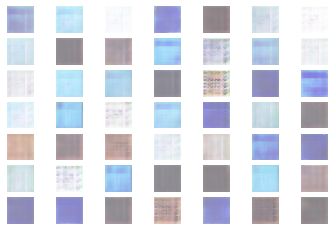

In [195]:
train_gan(g_model, d_model, gan_model, dataset, latent_dim)

### <a name='sec_4'></a>Section 4: Model Evaluation

Once we have trained our model, we will also need to evaluate the results. We will have to define functions that allow us to call upon trained models which were saved and plot out our results. We create new functions and also re-use some functions above from our modelling which will be useful.

In [34]:
from tensorflow.keras.models import load_model
from numpy.random import randn

# Create a function to create a plot of n x n number of plots
def create_plot(examples,n):
    for i in range(n * n):
        plt.subplot(n, n, 1+i)
        plt.axis('off')
        plt.imshow(examples[i, :, :])
    plt.show()

# create a function that takes in n, model path and plots
def plot_results(model_path, n):
    model = load_model(model_path)
    latent_points = generate_latent_points(100,n*n)
    X = model.predict(latent_points)
    X = (X + 1)/ 2.0
    create_plot(X, n)

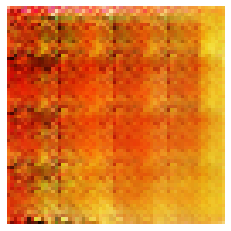

In [35]:
model_path = './saved models_and_plots/Round 1 (no batch norm)/generator_model_150.h5'

plot_results(model_path, 1)

When running our training, we did not see the model crash. There was no spike in any of the models' losses and we saw results improve gradually but plateau. Accuracy for both real and fake models were 90+% which indicates that our discriminator model was performing decently well. The GAN model loss hovered between 3-5 and we did not see much improvement as training continued. 

### <a name='sec_5'></a>Section 5: Model Refinements

There are some refinements we can explore given our initial results. We can look at training data as well as results to assess how well these refinements perform to a certain extent.

One of the refinements would be to [include batch normalisation](https://machinelearningmastery.com/how-to-train-stable-generative-adversarial-networks/) in our layers for the generator and discriminator. Batch normalization standardizes the activations from a prior layer to have a zero mean and unit variance. This has the effect of stabilizing the training process.

Batch normalization has become a staple when training deep convolutional neural networks, and GANs are no different. Batch norm layers are recommended in both the discriminator and generator models, except the output of the generator and input to the discriminator. Momentum defined as 0.8 has been found to be optimal in GANs.

We run the model with batch normalisation included in the generator.

In [36]:
# Amended code for generator model

from tensorflow.keras.layers import BatchNormalization
momentum = 0.8

# Define Generator
def define_generator(latent_dim):
    model = Sequential()
    
    model.add(Dense(n_nodes, input_dim = latent_dim))
    model.add(LeakyReLU(alpha=alpha))
    model.add(Reshape((4,4,256)))
    
    # upsample to 8 x 8
    model.add(Conv2DTranspose(128,(4,4), strides = strides, padding ='same'))
    model.add(BatchNormalization(momentum = momentum))             # New line included
    model.add(LeakyReLU(alpha=alpha))
    
    
    # upsample to 16 x 16
    model.add(Conv2DTranspose(128,(4,4), strides = strides, padding ='same'))
    model.add(BatchNormalization(momentum = momentum))            # New line included
    model.add(LeakyReLU(alpha=alpha))
   
    
    # upsample to 32 x 32
    model.add(Conv2DTranspose(128,(4,4), strides = strides, padding ='same'))
    model.add(BatchNormalization(momentum = momentum))           # New line included
    model.add(LeakyReLU(alpha=alpha))
    
    
    # upsample to 64 x 64
    model.add(Conv2DTranspose(128,(4,4), strides = strides, padding ='same'))
    model.add(BatchNormalization(momentum = momentum))          # New line included
    model.add(LeakyReLU(alpha=alpha))
    
    
    
    # output layer
    model.add(Conv2D(3, (3,3), activation = 'tanh', padding = 'same'))
    
    return model

In [37]:
model = define_generator(latent_dim)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4096)              413696    
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 4096)              0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_transpose_8 (Conv2DTr (None, 8, 8, 128)         524416    
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 128)         512       
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_transpose_9 (Conv2DTr (None, 16, 16, 128)      

We run the model once with only the generator having batch normalisation layers. The model managed to train and took a much shorter time to train as compared to the original baseline model. The original model took ~2 days to train for 150 epochs while introducing batch normalisation into the model cut this down to 1.5 days.

We next include batch normalisation in the discriminator model as well. We will amend the code for the discriminator as follows:

In [38]:
# Momentum is still recommended to be 0.8
# Define discriminator

def define_discriminator(in_shape=(64,64,3)):
    model = Sequential()
    
    # Normal
    model.add(Conv2D(128, (3,3), padding ='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=alpha))
    
    # Downsample
    model.add(Conv2D(256, (3,3), strides = strides, padding ='same'))
    model.add(BatchNormalization(momentum = momentum))             # New line included
    model.add(LeakyReLU(alpha=alpha))
    
    # Downsample
    model.add(Conv2D(256, (3,3), strides = strides, padding ='same'))
    model.add(BatchNormalization(momentum = momentum))             # New line included
    model.add(LeakyReLU(alpha=alpha))
    
    # Downsample
    model.add(Conv2D(512, (3,3), strides = strides, padding ='same'))
    model.add(BatchNormalization(momentum = momentum))             # New line included
    model.add(LeakyReLU(alpha=alpha))
    
    # Classifier
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile
    opt = Adam(learning_rate=adamlr, beta_1=beta_1)
    model.compile(loss='binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
    return model

In [39]:
model = define_discriminator()
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 64, 64, 128)       3584      
_________________________________________________________________
leaky_re_lu_23 (LeakyReLU)   (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 256)       295168    
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 256)       1024      
_________________________________________________________________
leaky_re_lu_24 (LeakyReLU)   (None, 32, 32, 256)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 256)       590080    
_________________________________________________________________
batch_normalization_5 (Batch (None, 16, 16, 256)      

The model ran faster but quickly collapsed. Generator and discriminator losses mvoed to 0 about after 3 epochs. This could be possibly so as batch normalisation in the discriminator resulted in poor training. The discriminator would benefit from a varied input and this caused the model to collapse. Given that the original training was stable and did not need the introduction of batch normalisation (other than reducing computing costs), there is no usefulness in including batch normalisation in the discriminator model.

The last improvement we can make is to train the model on a condensed dataset. It is noted that some of the pictures can be rather messy and noisy. We streamlined the dataset to include only pictures that have solid blocks of colours and clear distinctions. The dataset was shrunk to 1,656 images. These are some of the images included:

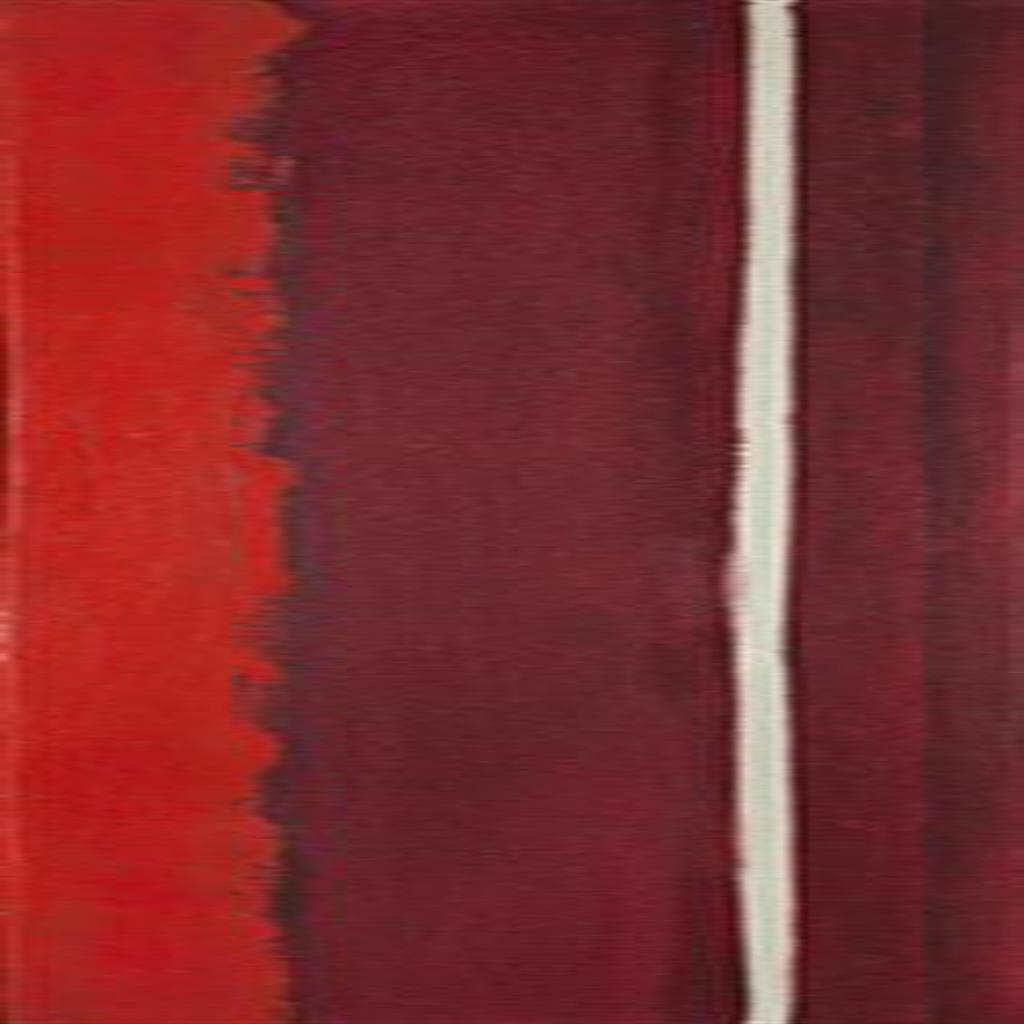

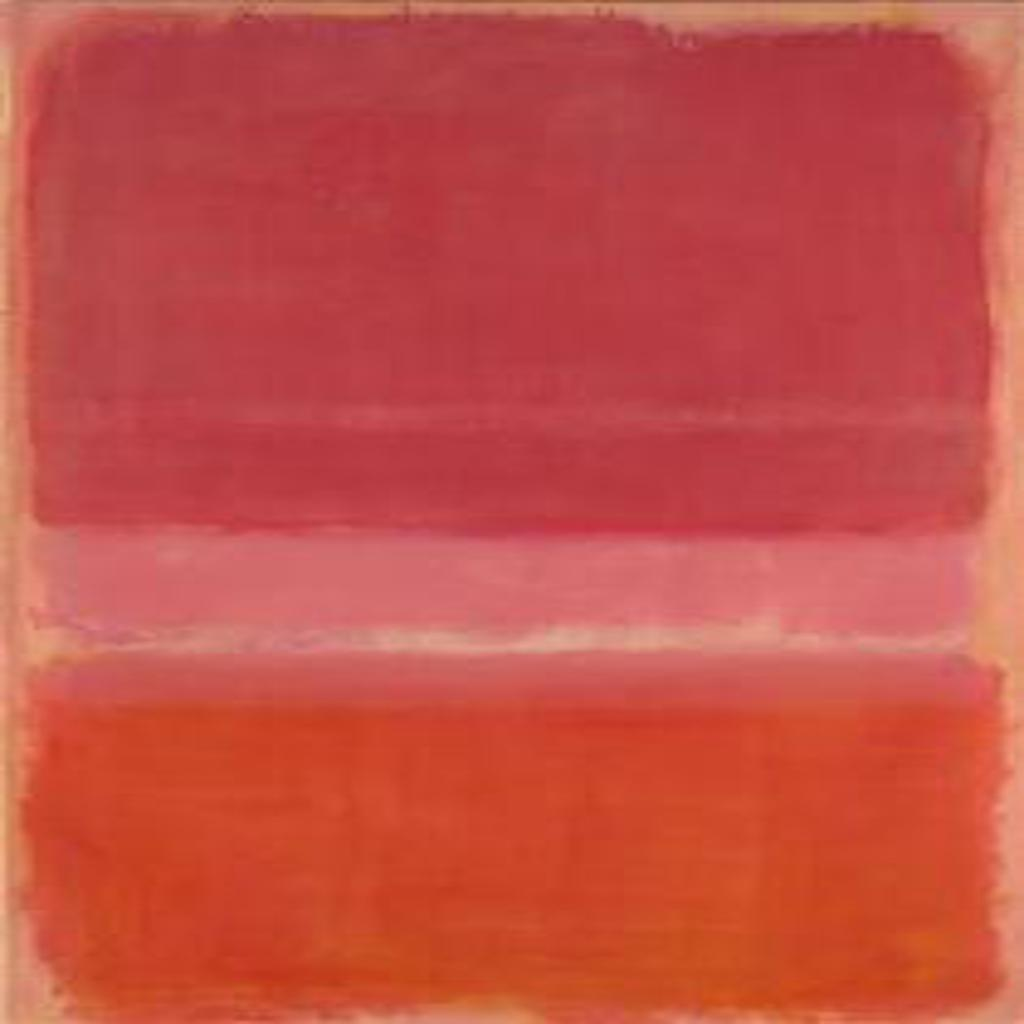

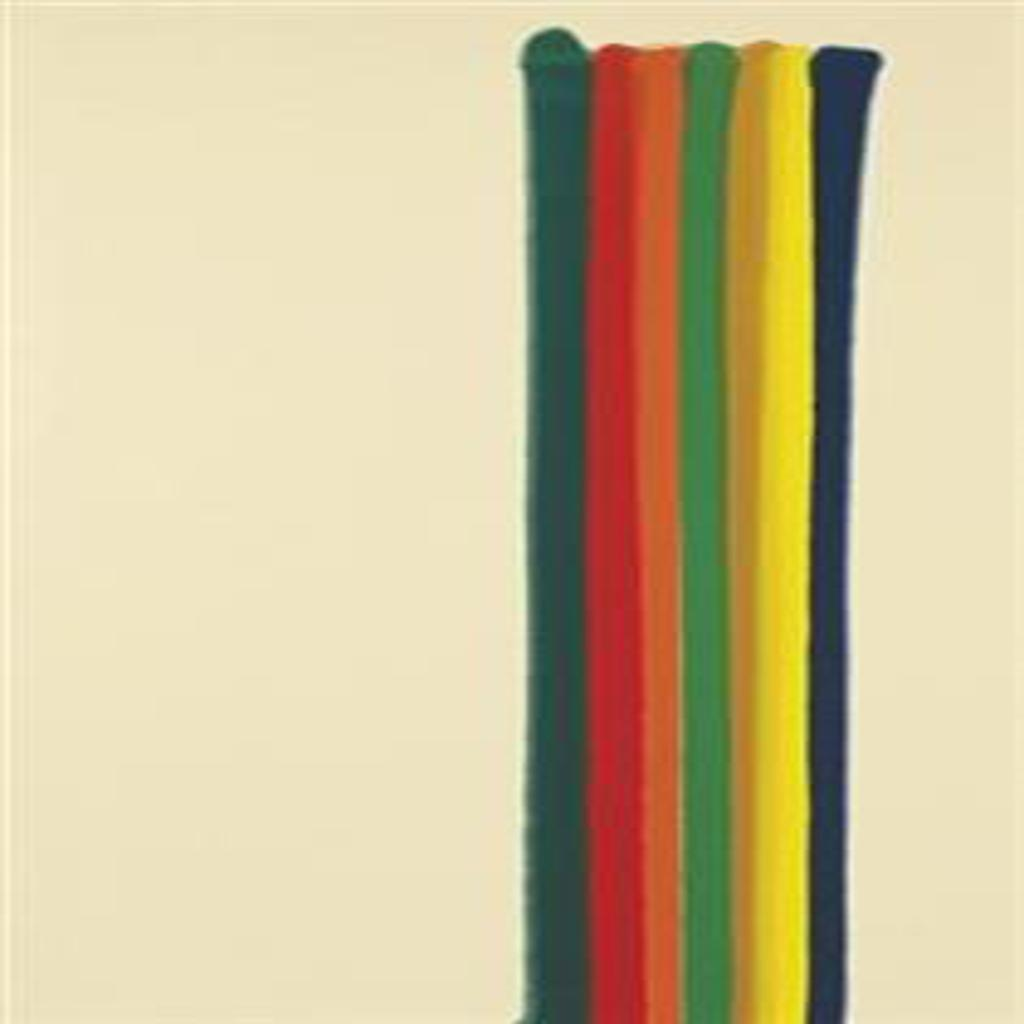

In [41]:
from IPython.display import display, Image

listOfImageNames = ['./data/curated_images/Barnet Newman16.jpg',
                    './data/curated_images/Mark Rothko39.jpg',
                   './data/curated_images/Morris Lewis71.jpg']

for imageName in listOfImageNames:
    display(Image(filename=imageName, width = 200, height =200))


### <a name='sec_6'></a>Section 6: Findings

Now that we have our 4 models, we will move on to analyse the results:
* **Model 1**: Baseline GAN
* **Model 2**: Baseline GAN with Batch Normalisation in Generator
* **Model 3**: Baseline GAN with Batch Normalisation in Generator and Discriminator
* **Model 4**: Baseline GAN with Batch Normalisation in Generator trained on curated dataset

Model 1 took approximately 2 days to run through 150 epochs. Training losses did not fluctuate much, the discriminator loss hovered from 0 to 1 and generator loss generally was in the range of 2 to 5. Model accuracy did improve through the first few epochs but stayed at 90+% over most epochs. However the results still gradually improved as shown below:

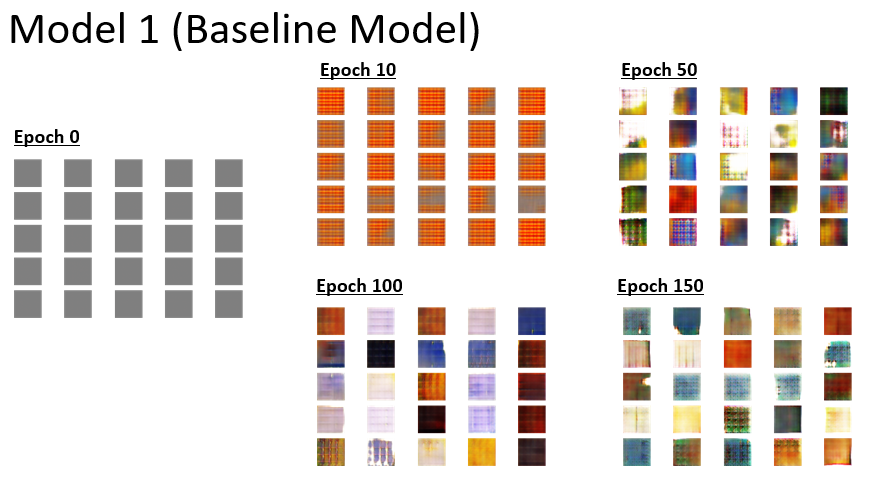

In [45]:
from IPython.display import display, Image

imageName = './data/misc_images/model1.png'
display(Image(filename=imageName, width = 1500, height =1500))

Model 2 took slightly shorter to run, approximately 1.5 days. Batch normalisation in the generator did help stabalise training and improve computing. Results also seem to be better.

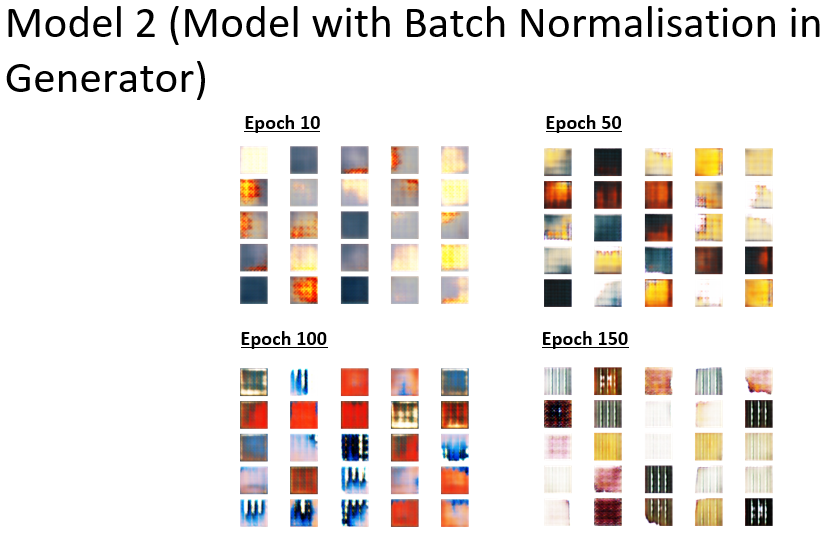

In [50]:

imageName = './data/misc_images/model2.png'
display(Image(filename=imageName, width = 900, height =900))

Model 3 did not perform well at all. Batch normalisation in the discriminator affected training and the model losses hit 0 after ~ 3 epochs. My assumption is that batch normalisation hindered the training of the discriminator. The discriminator would benefit from varied inputs but perhaps batch normalisation oversimplified the training data. This could also be attributed to the nature of the small batch size and small training data. However, there was no similar case that I could reference to and this could be a possible expansion of the project to understand clearly how batch normalisation works.

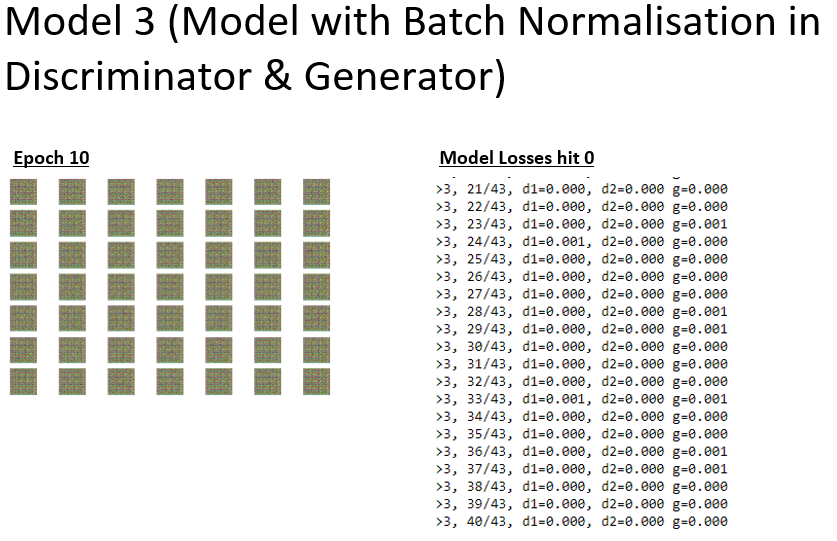

In [51]:

imageName = './data/misc_images/model3.png'
display(Image(filename=imageName, width = 900, height =900))

As for model 4, the training was much faster due to the nature of the small dataset. Training took approximately 4 hours. We saw that the generated images were more similar and more uniform. However, this hindered the creative potential of the models and they were somewhat restrained by the data fed to them.

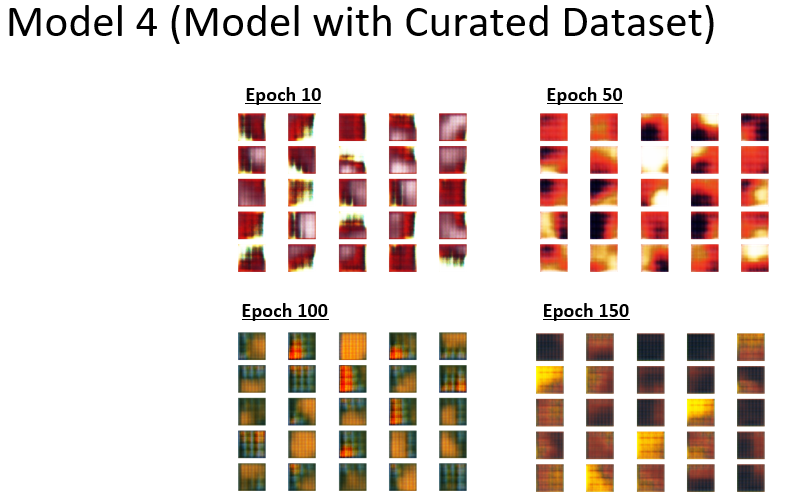

In [52]:
imageName = './data/misc_images/model4.png'
display(Image(filename=imageName, width = 900, height =900))

We threw away model 3 as the results were not meaningful and are left with 3 models. Given that the images were 64 x 64, they were rather pixelated and lacked the smoothness of a real painting. The next step was to improve the resolution of these images.

### Improving resolution using ESRGAN

A pre-trained model, enhanced super resolution GAN was used to improve the quality of the images. The notebook is found within the this github repo as well. As this was not the focus of the project, there will not be much explanation of the architecture of how ESRGAN works. SRGAN (super resolution GAN)is a generative adversarial network for single image super-resolution. It uses a perceptual loss function which consists of an adversarial loss and a content loss. The adversarial loss pushes the solution to the natural image manifold using a discriminator network that is trained to differentiate between the super-resolved images and original photo-realistic images. In addition, the authors use a content loss motivated by perceptual similarity instead of similarity in pixel space.

ESRGAN -  introduce the Residual-in-Residual Dense Block (RRDB) without batch normalization as the basic network building unit.

Here is an example of how the super resolution of images worked:

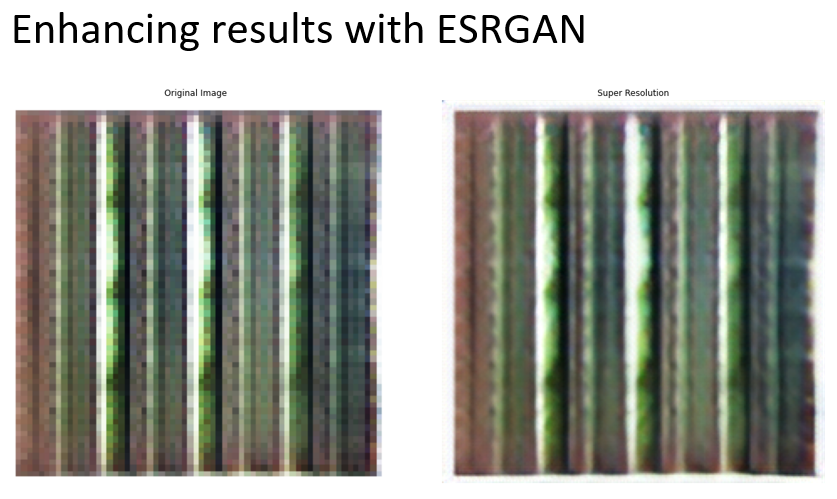

In [53]:
imageName = './data/misc_images/ESRGAN.png'
display(Image(filename=imageName, width = 900, height =900))

The next step was to generate 4 images from each of the 3 models and pass them through ESRGAN and compare the results.

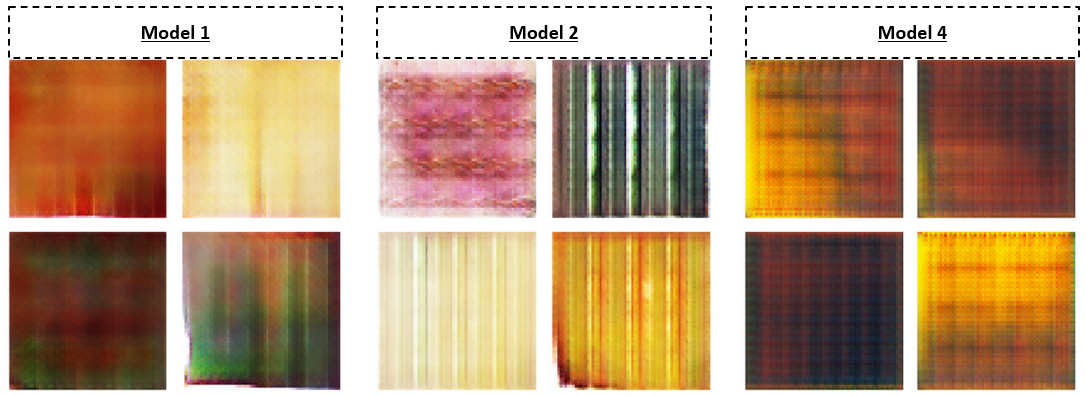

In [54]:
imageName = './data/misc_images/final.png'
display(Image(filename=imageName, width = 900, height =900))

All modeels produced satisfactory results with model 2 giving us the most varied results with reasonable computing time as well. Model 1 performed not too badly as well. Here are some comparisons between our original inputs and what was generated:

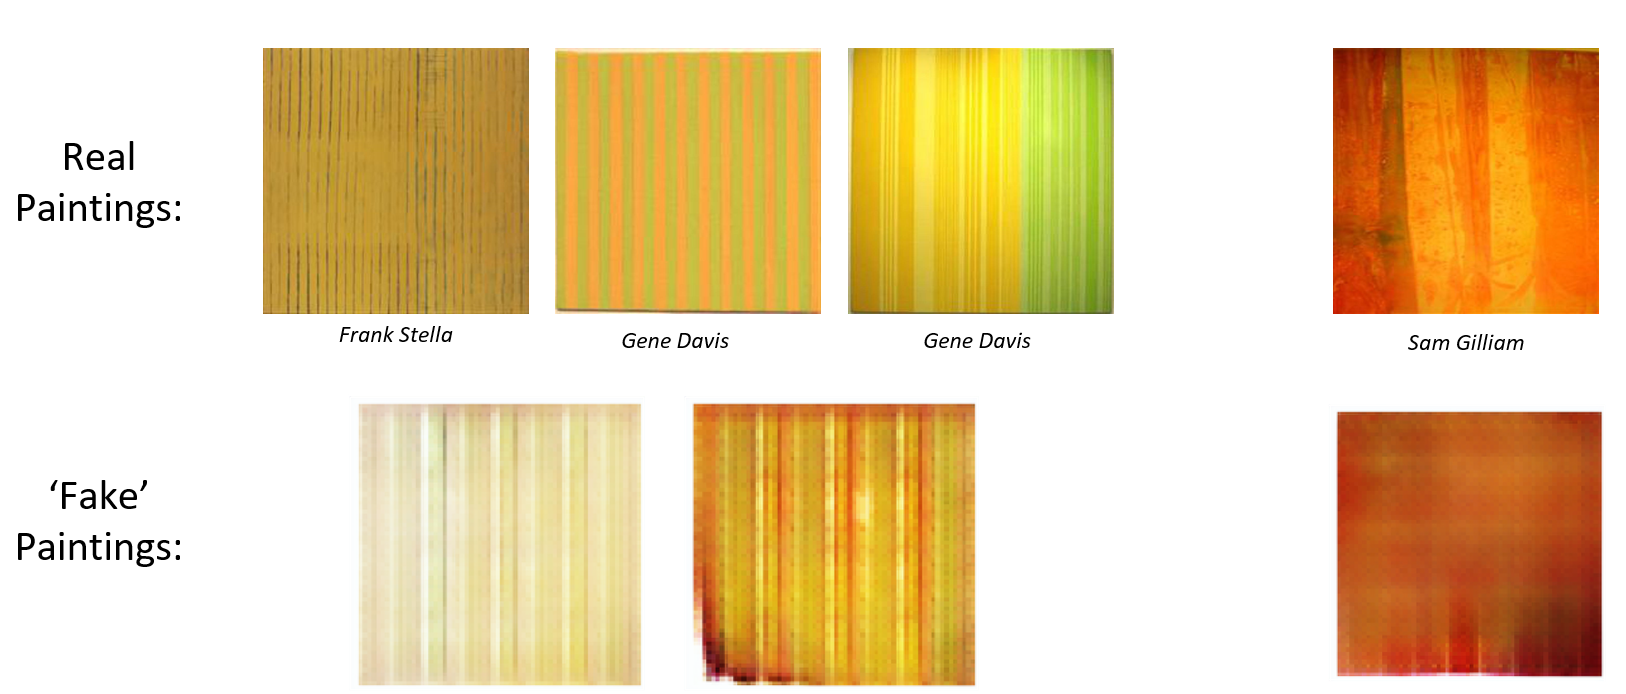

In [55]:
imageName = './data/misc_images/comparison.png'
display(Image(filename=imageName, width = 900, height =900))

The results show that GANs can indeed be used in the field of artworks and there is much potentially is using a system to 'aid' our learning of art in different styles and eras. 

Some other takeaways from the project are also some tips and tricks on how to optimise GANs:
* Quality of dataset is most important, including size and variation
* Gaussian-distributed values as latent space for generator input
* LeakyReLU activation layers
* Use strided convolutions instead of pooling layers
* Adam optimiser
* Seperate real and fake images for discriminator training
* Batch normalisation in generator
* Constantly monitor training progress

### Further Extensions

The extensions to this prject includes

1. Optimising training time even more
2. Train for more epochs
3. Train model on brand new segment of art

### References

[Introduction to GANs](https://machinelearningmastery.com/what-are-generative-adversarial-networks-gans/)

[Tips for improving GANS](https://machinelearningmastery.com/how-to-train-stable-generative-adversarial-networks/)

[Tips for accelerating learning with batch normalisation](https://machinelearningmastery.com/how-to-accelerate-learning-of-deep-neural-networks-with-batch-normalization/)

[Introduction to statistical distributions](https://machinelearningmastery.com/statistical-data-distributions/)

[GAN hacks in Keras](https://machinelearningmastery.com/how-to-code-generative-adversarial-network-hacks/)

[Introduction to Adam optimiser](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)

[Pooling vs Strided Convolutions](https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/)

[CIFAR GAN](https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-a-cifar-10-small-object-photographs-from-scratch/)

[DC GAN](https://www.tensorflow.org/tutorials/generative/dcgan)

[Image super resolution with ESRGAN](https://www.tensorflow.org/hub/tutorials/image_enhancing)

### Research Papers

These papers are found in the github repo under folder 'research'

* ESRGAN: Enhanced Super-Resolution Generative Adversarial Networks
* Generative Adversarial Nets
* Improved Techniques for Training GANs
* On the Effects of Batch and Weight Normalization in Generative Adversarial Networks
* PROGRESSIVE GROWING OF GANS FOR IMPROVED QUALITY, STABILITY, AND VARIATION
* UNSUPERVISED REPRESENTATION LEARNING WITH DEEP CONVOLUTIONAL GENERATIVE ADVERSARIAL NETWORKS
* VERY DEEP CONVOLUTIONAL NETWORKS FOR LARGE-SCALE IMAGE RECOGNITION